In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yelp-dataset/yelp_fake_reviews.csv
/kaggle/input/yelp-dataset/new_fake_reviews_data.csv
/kaggle/input/yelp-modified-data/ori_data_ds_final_train.csv
/kaggle/input/yelp-modified-data/ori_data_final_test.csv
/kaggle/input/yelp-modified-data/ori_data_ds_final_test.csv
/kaggle/input/yelp-modified-data/ori_data_us_final_val.csv
/kaggle/input/yelp-modified-data/ori_data_ds_final_val.csv
/kaggle/input/yelp-modified-data/ori_data_us_final_test.csv
/kaggle/input/yelp-modified-data/ori_data_final.csv
/kaggle/input/yelp-modified-data/ori_data_final_train.csv
/kaggle/input/yelp-modified-data/new_data_final_val.csv
/kaggle/input/yelp-modified-data/new_data_final.csv
/kaggle/input/yelp-modified-data/ori_data_final_val.csv
/kaggle/input/yelp-modified-data/new_data_final_train.csv
/kaggle/input/yelp-modified-data/ori_data_us_final_train.csv
/kaggle/input/yelp-modified-data/new_data_final_test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [16]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

In [4]:
# define the function for lemmatizing
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [5]:
def preprocess_text(text):
    return re.sub(r'\s+', ' ', text)

In [6]:
ori_data = pd.read_csv('/kaggle/input/yelp-dataset/yelp_fake_reviews.csv')
new_data = pd.read_csv('/kaggle/input/yelp-dataset/new_fake_reviews_data.csv')

In [8]:
ori_data['text_space'] = ori_data['REVIEW_TEXT'].apply(preprocess_text)
new_data['text_space'] = new_data['REVIEW_TEXT'].apply(preprocess_text)

In [23]:
ori_data['text_final'] = ori_data['text_space'].apply(lemmatize)
new_data['text_final'] = new_data['text_space'].apply(lemmatize)

In [9]:
ori_data['sentiment'] = [1 if rating > 3 else 0 for rating in ori_data['RATING']]
new_data['sentiment'] = [1 if rating > 3 else 0 for rating in new_data['RATING']]

In [24]:
ori_data['word_count'] = ori_data['text_final'].str.split().str.len()
new_data['word_count'] = new_data['text_final'].str.split().str.len()

In [25]:
ori_data = ori_data.drop(['REVIEW_TEXT', 'text_space'], axis=1)
new_data = new_data.drop(['REVIEW_TEXT', 'text_space'], axis=1)

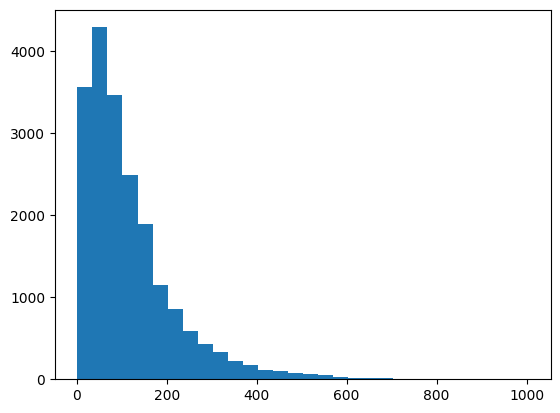

In [26]:
plt.hist(ori_data['word_count'], bins=30)
plt.show()

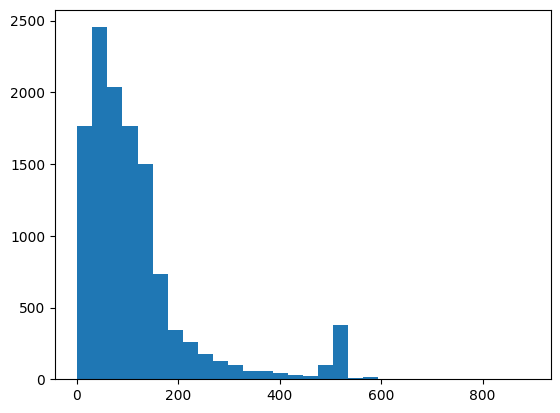

In [27]:
plt.hist(new_data['word_count'], bins=30)
plt.show()

In [29]:
bins_ori = [0, 20, 40, 80, 160, 340, 360, max(ori_data['word_count'])]

# define the labels for the categorical values
labels = [0, 1, 2, 3, 4, 5, 6]

# convert the numerical column to a categorical column based on the ranges and labels
ori_data['word_count_categories'] = pd.cut(ori_data['word_count'], bins=bins_ori, labels=labels)

In [30]:
bins_new = [0, 20, 40, 80, 160, 340, 360, max(new_data['word_count'])]

# convert the numerical column to a categorical column based on the ranges and labels
new_data['word_count_categories'] = pd.cut(new_data['word_count'], bins=bins_new, labels=labels)

In [31]:
ori_data = ori_data.drop(['word_count'], axis=1)
new_data = new_data.drop(['word_count'], axis=1)

In [32]:
ori_data.to_csv('ori_data_final.csv', index=False)
new_data.to_csv('new_data_final.csv', index=False)

In [33]:
ori_data = ori_data.sample(frac=1).reset_index(drop=True)

# split the data into training (80%), validation (10%), and testing (10%) sets
ori_train_df, ori_rem_df = train_test_split(ori_data, test_size=0.2, random_state=42)
ori_val_df, ori_test_df = train_test_split(ori_rem_df, test_size=0.5, random_state=42)

# save the splits into separate CSV files
ori_train_df.to_csv('ori_data_final_train.csv', index=False)
ori_val_df.to_csv('ori_data_final_val.csv', index=False)
ori_test_df.to_csv('ori_data_final_test.csv', index=False)

In [34]:
new_data = new_data.sample(frac=1).reset_index(drop=True)

# split the data into training (80%), validation (10%), and testing (10%) sets
new_train_df, new_rem_df = train_test_split(new_data, test_size=0.2, random_state=42)
new_val_df, new_test_df = train_test_split(new_rem_df, test_size=0.5, random_state=42)

# save the splits into separate CSV files
new_train_df.to_csv('new_data_final_train.csv', index=False)
new_val_df.to_csv('new_data_final_val.csv', index=False)
new_test_df.to_csv('new_data_final_test.csv', index=False)

In [39]:
ori_data['LABEL'].value_counts()

LABEL
 1    17926
-1     2074
Name: count, dtype: int64

In [41]:
ori_data_label_1 = ori_data[ori_data['LABEL'] == 1]
ori_data_label_0 = ori_data[ori_data['LABEL'] == -1]

# Randomly select 2074 records with label 1
ori_data_label_1_sampled = ori_data_label_1.sample(n=2074, random_state=42)

# Concatenate the sampled records with all records with label 0
ori_data_downsampled = pd.concat([ori_data_label_0, ori_data_label_1_sampled])

# Shuffle the DataFrame
ori_data_downsampled = ori_data_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [42]:
ori_data_downsampled['LABEL'].value_counts()

LABEL
-1    2074
 1    2074
Name: count, dtype: int64

In [43]:
ori_ds_train_df, ori_ds_rem_df = train_test_split(ori_data_downsampled, test_size=0.2, random_state=42)
ori_ds_val_df, ori_ds_test_df = train_test_split(ori_ds_rem_df, test_size=0.5, random_state=42)

# save the splits into separate CSV files
ori_ds_train_df.to_csv('ori_data_ds_final_train.csv', index=False)
ori_ds_val_df.to_csv('ori_data_ds_final_val.csv', index=False)
ori_ds_test_df.to_csv('ori_data_ds_final_test.csv', index=False)

In [46]:
ori_data_label_0_sampled = resample(ori_data_label_0,
                                 replace=True,
                                 n_samples= 17926, # to match majority class
                                 random_state=42)

ori_data_upsampled = pd.concat([ori_data_label_0_sampled, ori_data_label_1])
ori_data_upsampled = ori_data_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [47]:
ori_data_upsampled['LABEL'].value_counts()

LABEL
-1    17926
 1    17926
Name: count, dtype: int64

In [48]:
ori_us_train_df, ori_us_rem_df = train_test_split(ori_data_upsampled, test_size=0.2, random_state=42)
ori_us_val_df, ori_us_test_df = train_test_split(ori_us_rem_df, test_size=0.5, random_state=42)

# save the splits into separate CSV files
ori_us_train_df.to_csv('ori_data_us_final_train.csv', index=False)
ori_us_val_df.to_csv('ori_data_us_final_val.csv', index=False)
ori_us_test_df.to_csv('ori_data_us_final_test.csv', index=False)

## Running Models

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import loguniform
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance

In [5]:
ori_train_data = pd.read_csv('/kaggle/input/yelp-modified-data/ori_data_final_train.csv')
ori_valid_data = pd.read_csv('/kaggle/input/yelp-modified-data/ori_data_final_val.csv')
ori_test_data = pd.read_csv('/kaggle/input/yelp-modified-data/ori_data_final_test.csv')

In [4]:
def assign_class(label):
    if label == 1:
        return 1
    else:
        return 0

In [7]:
ori_train_data['label_final'] = ori_train_data['LABEL'].apply(assign_class)
ori_valid_data['label_final'] = ori_valid_data['LABEL'].apply(assign_class)
ori_test_data['label_final'] = ori_test_data['LABEL'].apply(assign_class)

In [8]:
ori_trainval_data = pd.concat([ori_train_data, ori_valid_data], ignore_index=True)

In [9]:
ori_trainval_data.columns

Index(['Unnamed: 0', 'USER_ID', 'PRODUCT_ID', 'RATING', 'DATE', 'LABEL',
       'AVERAGE_RATING', 'RATING_DEVIATION', 'TOTAL_PRODUCT_REVIEWS',
       'REVIEW_LENGTH', 'RATING_CATEGORY', 'SINGLE_RATING_CATEGORY',
       'REVIEW_COUNT_DATE', 'SAME_DATE_MULTIPLE_REVIEWS',
       'MAX_USER_REVIEWS_DAY', 'TIMESTAMP_DIFFERENCE',
       'AVERAGE_USER_REVIEW_LENGTH', 'TOTAL_USER_REVIEWS',
       'PERCENTAGE_POSITIVE_REVIEWS', 'RATIO_POSITIVE_NEGATIVE', 'sentiment',
       'text_final', 'word_count_categories', 'label_final'],
      dtype='object')

In [10]:
feature_names = ['text_final', 'RATING', 'sentiment', 'word_count_categories']

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [12]:
# Define preprocessing steps for text feature and categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'text_final'),
        ('cat', OneHotEncoder(), ['RATING', 'sentiment', 'word_count_categories'])
    ]
)

preprocessor_textonly = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'text_final')
    ]
)

In [13]:
# Define the logistic regression model
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Define hyperparameters to optimize over
hyperparameters_lr = {
    'classifier__C': loguniform(0.01, 100),
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_lr_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', LogisticRegression())
])

# Define hyperparameters to optimize over
hyperparameters_lr_text = {
    'classifier__C': loguniform(0.01, 100),
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

###################################################################################################

# Define the k nearest neighbors model
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_knn = {
    'classifier__n_neighbors': range(2, 20),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'brute'],
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_knn_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', KNeighborsClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_knn_text = {
    'classifier__n_neighbors': range(2, 20),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'brute'],
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

###################################################################################################

# Define the SVC model
model_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))
])

# Define hyperparameters to optimize over
hyperparameters_svc = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto'],
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_svc_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', SVC(probability=True))
])

# Define hyperparameters to optimize over
hyperparameters_svc_text = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto'],
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

###################################################################################################

# Define the Naive Bayes model
model_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

# Define hyperparameters to optimize over
hyperparameters_nb = {
    'classifier__alpha': stats.uniform(0, 1),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_nb_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', MultinomialNB())
])

# Define hyperparameters to optimize over
hyperparameters_nb_text = {
    'classifier__alpha': stats.uniform(0, 1),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

###################################################################################################

# Define the Decision Tree classifier model
model_dtc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_dtc = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': stats.randint(1, 100),
    'classifier__min_samples_split': stats.randint(2, 11),
    'classifier__min_samples_leaf': stats.randint(1, 11),
    'classifier__max_features': stats.uniform(0, 1),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_dtc_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', DecisionTreeClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_dtc_text = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': stats.randint(1, 100),
    'classifier__min_samples_split': stats.randint(2, 11),
    'classifier__min_samples_leaf': stats.randint(1, 11),
    'classifier__max_features': stats.uniform(0, 1),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

###################################################################################################

# Define the Random Forest classifier model
model_rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_rfc = {
    'classifier__n_estimators': stats.randint(10, 200),
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': stats.randint(1, 100),
    'classifier__min_samples_split': stats.randint(2, 11),
    'classifier__min_samples_leaf': stats.randint(1, 11),
    'classifier__max_features': stats.uniform(0, 1),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_rfc_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', RandomForestClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_rfc_text = {
    'classifier__n_estimators': stats.randint(10, 200),
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': stats.randint(1, 100),
    'classifier__min_samples_split': stats.randint(2, 11),
    'classifier__min_samples_leaf': stats.randint(1, 11),
    'classifier__max_features': stats.uniform(0, 1),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

###################################################################################################

# Define the AdaBoost classifier model
model_abc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_abc = {    
    'classifier__n_estimators': stats.randint(10, 200),
    'classifier__learning_rate': stats.uniform(0.01, 0.5),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_abc_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', AdaBoostClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_abc_text = {    
    'classifier__n_estimators': stats.randint(10, 200),
    'classifier__learning_rate': stats.uniform(0.01, 0.5),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

###################################################################################################

# Define the XGBoost classifier model
model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_xgb = {   
    'classifier__n_estimators': stats.randint(10, 200),
    'classifier__learning_rate': stats.uniform(0.01, 0.5),
    'classifier__max_depth': stats.randint(2, 10),
    'classifier__subsample': stats.uniform(0.6, 0.4),
    'classifier__colsample_bytree': stats.uniform(0.6, 0.4),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

model_xgb_text = Pipeline(steps=[
    ('preprocessor', preprocessor_textonly),
    ('classifier', XGBClassifier())
])

# Define hyperparameters to optimize over
hyperparameters_xgb_text = {   
    'classifier__n_estimators': stats.randint(10, 200),
    'classifier__learning_rate': stats.uniform(0.01, 0.5),
    'classifier__max_depth': stats.randint(2, 10),
    'classifier__subsample': stats.uniform(0.6, 0.4),
    'classifier__colsample_bytree': stats.uniform(0.6, 0.4),
    'preprocessor__text__max_features': [500, 1000, 2000],
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)]
}

#### Logistic Regression - Ori Data

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Accuracy: 0.896
Precision: 0.897
Recall: 0.999
F1 score: 0.945

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.90      1.00      0.95      1795

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.81      0.90      0.85      2000

AUC-ROC score: 0.697
{'classifier__C': 0.3148911647956861, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 1)}
accuracy
recall


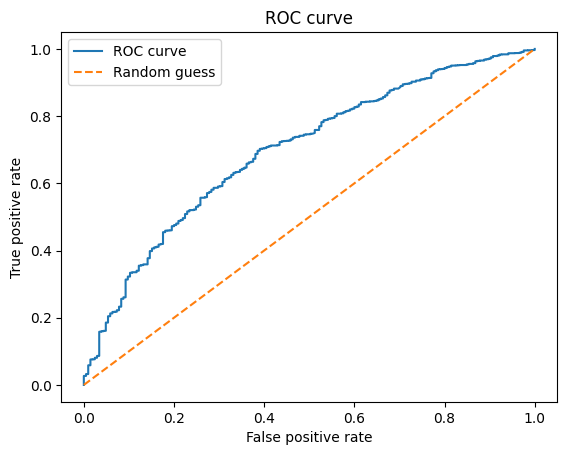

In [14]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = ori_trainval_data[['text_final', 'RATING', 'sentiment', 'word_count_categories']]
y_trainval = ori_trainval_data['label_final']
search = RandomizedSearchCV(model_lr, hyperparameters_lr, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = ori_test_data[['text_final', 'RATING', 'sentiment', 'word_count_categories']]
y_test = ori_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
    print(f"{metric}")
    result = r[metric]
    for i in result.importances_mean.argsort()[::-1]:
        if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
            print(f"    {feature_names[i]:<8}   " 
                f"{result.importances_mean[i]:.3f}"
                f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.897
Precision: 0.897
Recall: 1.000
F1 score: 0.946

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.90      1.00      0.95      1795

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.81      0.90      0.85      2000

AUC-ROC score: 0.666
{'classifier__C': 0.016813042706040664, 'classifier__penalty': 'l2', 'classifier__solver': 'saga', 'preprocessor__text__max_features': 1000, 'preprocessor__text__ngram_range': (1, 2)}


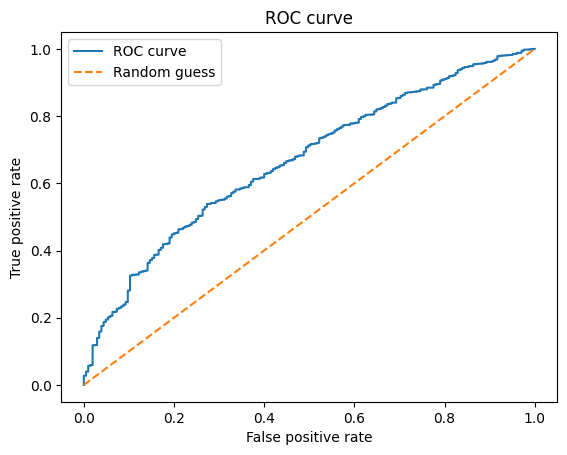

In [15]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = ori_trainval_data[['text_final']]
y_trainval = ori_trainval_data['label_final']
search = RandomizedSearchCV(model_lr_text, hyperparameters_lr_text, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = ori_test_data[['text_final']]
y_test = ori_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

#### Logistic Regression - Ori Data Downsampled

In [16]:
ori_train_ds_data = pd.read_csv('/kaggle/input/yelp-modified-data/ori_data_ds_final_train.csv')
ori_valid_ds_data = pd.read_csv('/kaggle/input/yelp-modified-data/ori_data_ds_final_val.csv')
ori_test_ds_data = pd.read_csv('/kaggle/input/yelp-modified-data/ori_data_ds_final_test.csv')

In [17]:
ori_train_ds_data['label_final'] = ori_train_ds_data['LABEL'].apply(assign_class)
ori_valid_ds_data['label_final'] = ori_valid_ds_data['LABEL'].apply(assign_class)
ori_test_ds_data['label_final'] = ori_test_ds_data['LABEL'].apply(assign_class)

In [18]:
ori_trainval_ds_data = pd.concat([ori_train_ds_data, ori_valid_ds_data], ignore_index=True)

In [19]:
feature_names = ['text_final', 'RATING', 'sentiment', 'word_count_categories']

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.634
Precision: 0.637
Recall: 0.643
F1 score: 0.640

Classification report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63       205
           1       0.64      0.64      0.64       210

    accuracy                           0.63       415
   macro avg       0.63      0.63      0.63       415
weighted avg       0.63      0.63      0.63       415

AUC-ROC score: 0.724
{'classifier__C': 0.6870614282613295, 'classifier__penalty': 'l1', 'classifier__solver': 'saga', 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}
accuracy
    word_count_categories   0.059 +/- 0.013
    RATING     0.042 +/- 0.016
recall
    word_count_categories   0.041 +/- 0.020
    RATING     0.040 +/- 0.019


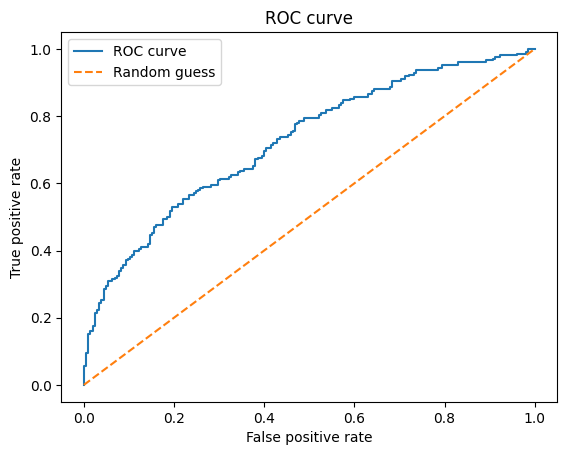

In [20]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = ori_trainval_ds_data[['text_final', 'RATING', 'sentiment', 'word_count_categories']]
y_trainval = ori_trainval_ds_data['label_final']
search = RandomizedSearchCV(model_lr, hyperparameters_lr, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = ori_test_ds_data[['text_final', 'RATING', 'sentiment', 'word_count_categories']]
y_test = ori_test_ds_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
    print(f"{metric}")
    result = r[metric]
    for i in result.importances_mean.argsort()[::-1]:
        if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
            print(f"    {feature_names[i]:<8}   " 
                f"{result.importances_mean[i]:.3f}"
                f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.619
Precision: 0.620
Recall: 0.638
F1 score: 0.629

Classification report:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       205
           1       0.62      0.64      0.63       210

    accuracy                           0.62       415
   macro avg       0.62      0.62      0.62       415
weighted avg       0.62      0.62      0.62       415

AUC-ROC score: 0.651
{'classifier__C': 2.8016351587162585, 'classifier__penalty': 'l2', 'classifier__solver': 'saga', 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}
accuracy
    text_final   0.114 +/- 0.016
recall
    text_final   0.113 +/- 0.016


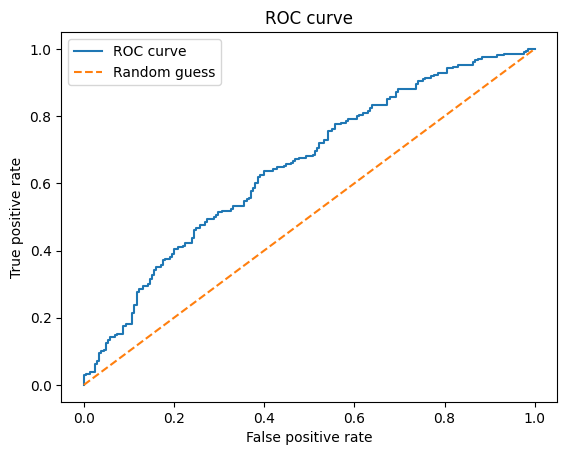

In [21]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = ori_trainval_ds_data[['text_final']]
y_trainval = ori_trainval_ds_data['label_final']
search = RandomizedSearchCV(model_lr_text, hyperparameters_lr_text, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = ori_test_ds_data[['text_final']]
y_test = ori_test_ds_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
    print(f"{metric}")
    result = r[metric]
    for i in result.importances_mean.argsort()[::-1]:
        if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
            print(f"    {feature_names[i]:<8}   " 
                f"{result.importances_mean[i]:.3f}"
                f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

#### Logistic Regression - Ori Data Upsampled

In [22]:
ori_train_us_data = pd.read_csv('/kaggle/input/yelp-modified-data/ori_data_us_final_train.csv')
ori_valid_us_data = pd.read_csv('/kaggle/input/yelp-modified-data/ori_data_us_final_val.csv')
ori_test_us_data = pd.read_csv('/kaggle/input/yelp-modified-data/ori_data_us_final_test.csv')

In [23]:
ori_train_us_data['label_final'] = ori_train_us_data['LABEL'].apply(assign_class)
ori_valid_us_data['label_final'] = ori_valid_us_data['LABEL'].apply(assign_class)
ori_test_us_data['label_final'] = ori_test_us_data['LABEL'].apply(assign_class)

In [24]:
ori_trainval_us_data = pd.concat([ori_train_us_data, ori_valid_us_data], ignore_index=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.770
Precision: 0.800
Recall: 0.731
F1 score: 0.764

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1754
           1       0.80      0.73      0.76      1832

    accuracy                           0.77      3586
   macro avg       0.77      0.77      0.77      3586
weighted avg       0.77      0.77      0.77      3586

AUC-ROC score: 0.838
{'classifier__C': 2.8016351587162585, 'classifier__penalty': 'l2', 'classifier__solver': 'saga', 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}
accuracy
    text_final   0.238 +/- 0.006
    RATING     0.019 +/- 0.004
recall
    text_final   0.217 +/- 0.006
    RATING     0.011 +/- 0.004
    sentiment   0.005 +/- 0.001


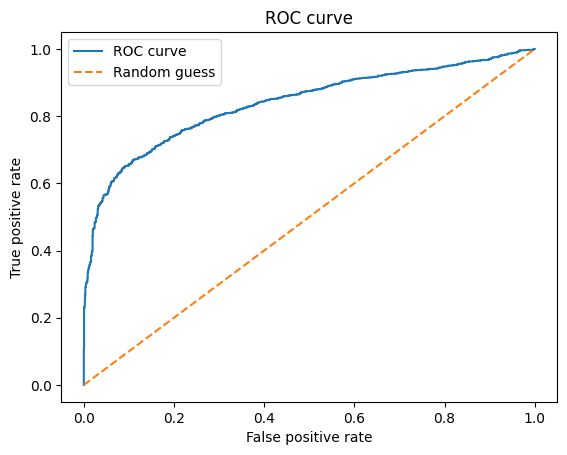

In [25]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = ori_trainval_us_data[['text_final', 'RATING', 'sentiment', 'word_count_categories']]
y_trainval = ori_trainval_us_data['label_final']
search = RandomizedSearchCV(model_lr, hyperparameters_lr, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = ori_test_us_data[['text_final', 'RATING', 'sentiment', 'word_count_categories']]
y_test = ori_test_us_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
    print(f"{metric}")
    result = r[metric]
    for i in result.importances_mean.argsort()[::-1]:
        if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
            print(f"    {feature_names[i]:<8}   " 
                f"{result.importances_mean[i]:.3f}"
                f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.764
Precision: 0.795
Recall: 0.727
F1 score: 0.759

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1754
           1       0.79      0.73      0.76      1832

    accuracy                           0.76      3586
   macro avg       0.77      0.77      0.76      3586
weighted avg       0.77      0.76      0.76      3586

AUC-ROC score: 0.830
{'classifier__C': 2.8016351587162585, 'classifier__penalty': 'l2', 'classifier__solver': 'saga', 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}


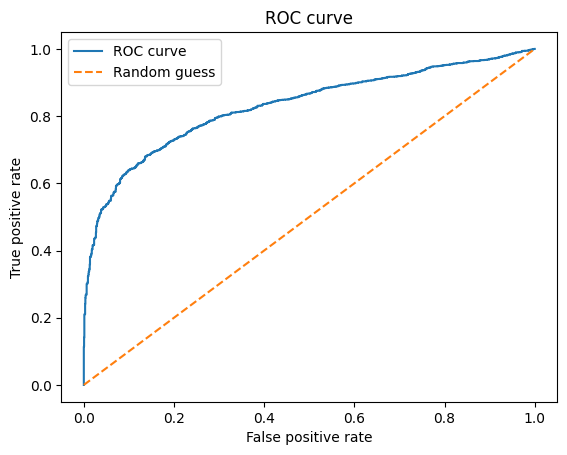

In [26]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = ori_trainval_us_data[['text_final']]
y_trainval = ori_trainval_us_data['label_final']
search = RandomizedSearchCV(model_lr_text, hyperparameters_lr_text, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = ori_test_us_data[['text_final']]
y_test = ori_test_us_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

#### Logistic Regression - New Data (Add)

In [27]:
new_train_data = pd.read_csv('/kaggle/input/yelp-modified-data/new_data_final_train.csv')
new_valid_data = pd.read_csv('/kaggle/input/yelp-modified-data/new_data_final_val.csv')
new_test_data = pd.read_csv('/kaggle/input/yelp-modified-data/new_data_final_test.csv')

In [28]:
new_train_data['label_final'] = new_train_data['LABEL'].apply(assign_class)
new_valid_data['label_final'] = new_valid_data['LABEL'].apply(assign_class)
new_test_data['label_final'] = new_test_data['LABEL'].apply(assign_class)

In [29]:
new_trainval_data = pd.concat([new_train_data, new_valid_data], ignore_index=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Accuracy: 0.810
Precision: 0.836
Recall: 0.779
F1 score: 0.806

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       590
           1       0.84      0.78      0.81       610

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200

AUC-ROC score: 0.897
{'classifier__C': 2.8016351587162585, 'classifier__penalty': 'l2', 'classifier__solver': 'saga', 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}
accuracy
    text_final   0.300 +/- 0.015
    word_count_categories   0.017 +/- 0.005
recall
    text_final   0.293 +/- 0.020


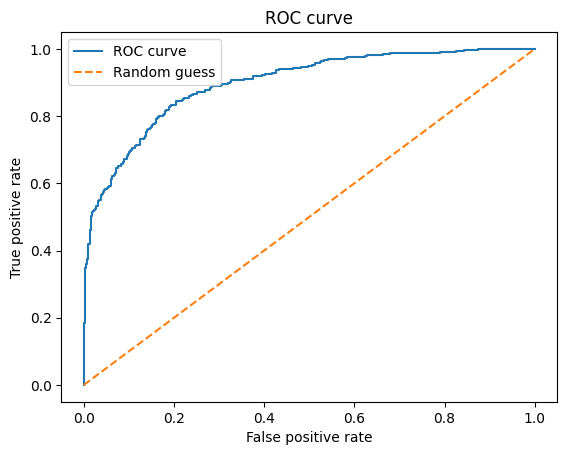

In [30]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final', 'RATING', 'sentiment', 'word_count_categories']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_lr, hyperparameters_lr, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final', 'RATING', 'sentiment', 'word_count_categories']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
    print(f"{metric}")
    result = r[metric]
    for i in result.importances_mean.argsort()[::-1]:
        if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
            print(f"    {feature_names[i]:<8}   " 
                f"{result.importances_mean[i]:.3f}"
                f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.811
Precision: 0.840
Recall: 0.775
F1 score: 0.806

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       590
           1       0.84      0.78      0.81       610

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200

AUC-ROC score: 0.889
{'classifier__C': 2.8016351587162585, 'classifier__penalty': 'l2', 'classifier__solver': 'saga', 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}
accuracy
    text_final   0.318 +/- 0.014
recall
    text_final   0.312 +/- 0.014


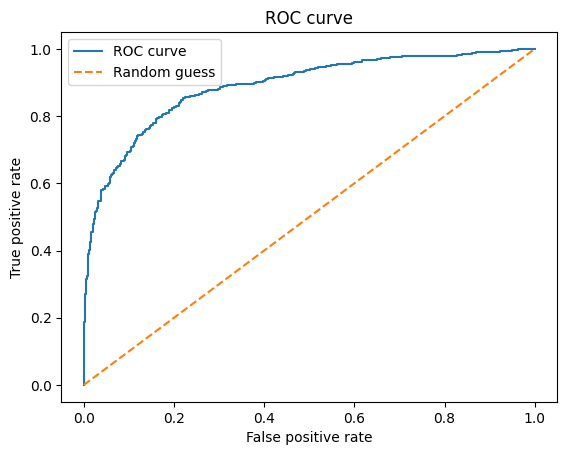

In [31]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_lr_text, hyperparameters_lr_text, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
    print(f"{metric}")
    result = r[metric]
    for i in result.importances_mean.argsort()[::-1]:
        if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
            print(f"    {feature_names[i]:<8}   " 
                f"{result.importances_mean[i]:.3f}"
                f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

**From the above results we determine that the new dataset generated would have better accuracies.**

#### SVC - New Data (Add)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.773
Precision: 0.816
Recall: 0.715
F1 score: 0.762

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       590
           1       0.82      0.71      0.76       610

    accuracy                           0.77      1200
   macro avg       0.78      0.77      0.77      1200
weighted avg       0.78      0.77      0.77      1200

AUC-ROC score: 0.850
{'preprocessor__text__ngram_range': (1, 2), 'preprocessor__text__max_features': 500, 'classifier__kernel': 'linear', 'classifier__gamma': 'scale', 'classifier__C': 1}
accuracy
    text_final   0.259 +/- 0.013
    word_count_categories   0.021 +/- 0.008
recall
    text_final   0.237 +/- 0.012


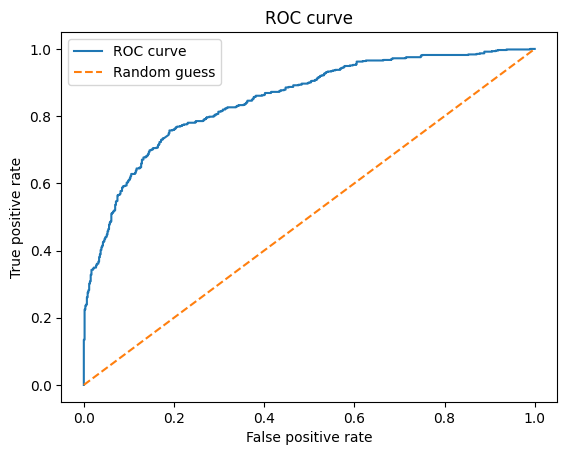

In [32]:
X_trainval = new_trainval_data[['text_final', 'RATING', 'sentiment', 'word_count_categories']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_svc, hyperparameters_svc, cv=5, n_jobs=-1, verbose=1, n_iter=5, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final', 'RATING', 'sentiment', 'word_count_categories']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
    print(f"{metric}")
    result = r[metric]
    for i in result.importances_mean.argsort()[::-1]:
        if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
            print(f"    {feature_names[i]:<8}   " 
                f"{result.importances_mean[i]:.3f}"
                f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

#### Multinomial NB - New Data (Add)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.782
Precision: 0.851
Recall: 0.693
F1 score: 0.764

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.80       590
           1       0.85      0.69      0.76       610

    accuracy                           0.78      1200
   macro avg       0.79      0.78      0.78      1200
weighted avg       0.79      0.78      0.78      1200

AUC-ROC score: 0.866
{'classifier__alpha': 0.45606998421703593, 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}
accuracy
    text_final   0.238 +/- 0.012
    word_count_categories   0.042 +/- 0.005
recall
    text_final   0.201 +/- 0.012


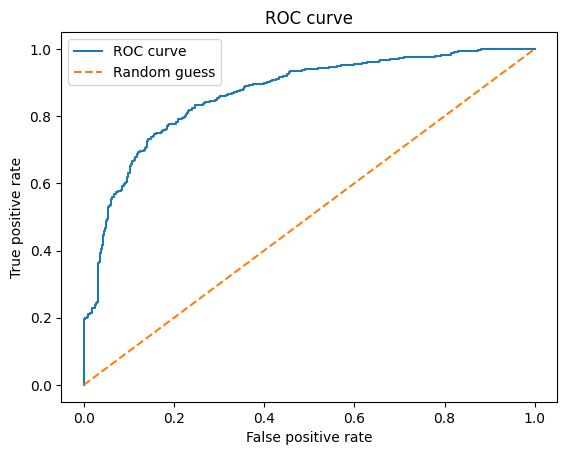

In [33]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final', 'RATING', 'sentiment', 'word_count_categories']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_nb, hyperparameters_nb, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final', 'RATING', 'sentiment', 'word_count_categories']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
    print(f"{metric}")
    result = r[metric]
    for i in result.importances_mean.argsort()[::-1]:
        if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
            print(f"    {feature_names[i]:<8}   " 
                f"{result.importances_mean[i]:.3f}"
                f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

#### RF - New Data (Add)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.735
Precision: 0.769
Recall: 0.684
F1 score: 0.724

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       590
           1       0.77      0.68      0.72       610

    accuracy                           0.73      1200
   macro avg       0.74      0.74      0.73      1200
weighted avg       0.74      0.73      0.73      1200

AUC-ROC score: 0.821
{'classifier__criterion': 'entropy', 'classifier__max_depth': 58, 'classifier__max_features': 0.5247564316322378, 'classifier__min_samples_leaf': 9, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 68, 'preprocessor__text__max_features': 2000, 'preprocessor__text__ngram_range': (1, 2)}
accuracy
    text_final   0.228 +/- 0.013
    word_count_categories   0.030 +/- 0.006
recall
    text_final   0.245 +/- 0.016
    word_count_categories   0.053 +/- 0.008


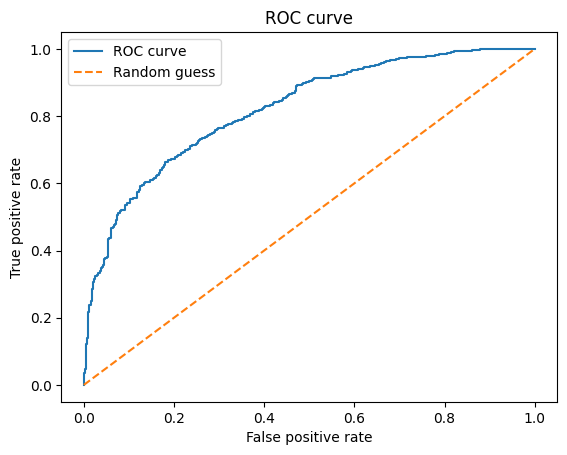

In [34]:
# Use RandomizedSearchCV to find the best hyperparameters on the combined training and validation set
X_trainval = new_trainval_data[['text_final', 'RATING', 'sentiment', 'word_count_categories']]
y_trainval = new_trainval_data['label_final']
search = RandomizedSearchCV(model_rfc, hyperparameters_rfc, cv=5, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
search.fit(X_trainval, y_trainval)
best_model = search.best_estimator_

# Evaluate the best model on the test set
X_test = new_test_data[['text_final', 'RATING', 'sentiment', 'word_count_categories']]
y_test = new_test_data['label_final']
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print metrics
print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1 score: {:.3f}'.format(f1))
print('\nClassification report:')
print(report)
print('AUC-ROC score: {:.3f}'.format(auc_roc))
print(search.best_params_)
r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=0, 
                          scoring=['accuracy', 'recall'])
for metric in r:
    print(f"{metric}")
    result = r[metric]
    for i in result.importances_mean.argsort()[::-1]:
        if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
            print(f"    {feature_names[i]:<8}   " 
                f"{result.importances_mean[i]:.3f}"
                f" +/- {result.importances_std[i]:.3f}")

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from tqdm import tqdm

# Load the dataset
file_path = '/kaggle/input/yelp-modified-data/new_data_final.csv'
df = pd.read_csv(file_path)
df['label_final'] = df['LABEL'].apply(assign_class)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text = tfidf_vectorizer.fit_transform(df['text_final']).toarray()

# Select relevant features and target
features = ['RATING', 'sentiment', 'word_count_categories']
target = 'label_final'

X_other_features = df[features].values
y = df[target].values

# Split the data into training and testing sets
X_train_text, X_test_text, X_train_other, X_test_other, y_train, y_test = train_test_split(
    X_text, X_other_features, y, test_size=0.2, random_state=42)

# Define a custom dataset class
class YelpReviewDataset(Dataset):
    def __init__(self, text, other_features, labels):
        self.text = torch.tensor(text, dtype=torch.float32)
        self.other_features = torch.tensor(other_features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'text': self.text[idx],
            'other_features': self.other_features[idx].numpy(),
            'labels': self.labels[idx]
        }

# Create DataLoader for training and testing
batch_size = 32
train_dataset = YelpReviewDataset(X_train_text, X_train_other, y_train)
test_dataset = YelpReviewDataset(X_test_text, X_test_other, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network model
class YelpReviewModel(nn.Module):
    def __init__(self, text_input_dim, other_input_dim):
        super(YelpReviewModel, self).__init__()
        self.fc_text = nn.Linear(text_input_dim, 128)
        self.fc_other = nn.Linear(other_input_dim, 64)
        self.fc_combined = nn.Linear(128 + 64, 2)  # Two classes: Fake and Real

    def forward(self, x_text, x_other):
        x_text = torch.relu(self.fc_text(x_text))
        x_other = torch.relu(self.fc_other(x_other))
        x_combined = torch.cat([x_text, x_other], dim=1)
        x = self.fc_combined(x_combined)
        return x

# Initialize the model, loss function, and optimizer
text_input_dim = X_text.shape[1]
other_input_dim = X_other_features.shape[1]
model = YelpReviewModel(text_input_dim, other_input_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        text = batch['text'].to(device)
        other_features = batch['other_features'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(text, other_features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f'Training Loss: {average_loss:.4f}')

# Evaluate the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch in tqdm(test_loader, desc='Evaluating'):
        text = batch['text'].to(device)
        other_features = batch['other_features'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(text, other_features)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'\nTest Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10: 100%|██████████| 300/300 [00:01<00:00, 228.16it/s]


Training Loss: 0.5185


Epoch 2/10: 100%|██████████| 300/300 [00:00<00:00, 388.56it/s]


Training Loss: 0.2821


Epoch 3/10: 100%|██████████| 300/300 [00:00<00:00, 384.01it/s]


Training Loss: 0.2135


Epoch 4/10: 100%|██████████| 300/300 [00:00<00:00, 364.58it/s]


Training Loss: 0.1757


Epoch 5/10: 100%|██████████| 300/300 [00:00<00:00, 378.08it/s]


Training Loss: 0.1492


Epoch 6/10: 100%|██████████| 300/300 [00:00<00:00, 381.57it/s]


Training Loss: 0.1257


Epoch 7/10: 100%|██████████| 300/300 [00:00<00:00, 386.12it/s]


Training Loss: 0.1077


Epoch 8/10: 100%|██████████| 300/300 [00:00<00:00, 385.27it/s]


Training Loss: 0.0953


Epoch 9/10: 100%|██████████| 300/300 [00:00<00:00, 375.61it/s]


Training Loss: 0.0819


Epoch 10/10: 100%|██████████| 300/300 [00:00<00:00, 388.18it/s]


Training Loss: 0.0723


Evaluating: 100%|██████████| 75/75 [00:00<00:00, 446.94it/s]


Test Accuracy: 79.92%


In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid

# Load the dataset
file_path = '/kaggle/input/yelp-modified-data/new_data_final.csv'
df = pd.read_csv(file_path)
df['label_final'] = df['LABEL'].apply(assign_class)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text = tfidf_vectorizer.fit_transform(df['text_final']).toarray()

# Select relevant features and target
features = ['RATING', 'sentiment', 'word_count_categories']
target = 'label_final'

X_features = df[features].values
y = df[target].values

# Split the data into training and testing sets
X_text_train, X_text_test, X_features_train, X_features_test, y_train, y_test = train_test_split(
    X_text, X_features, y, test_size=0.2, random_state=42)


# Define a custom dataset class
class YelpReviewDataset(Dataset):
    def __init__(self, text, features, labels):
        self.text = torch.tensor(text, dtype=torch.float32)
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'text': self.text[idx],
            'features': self.features[idx],
            'labels': self.labels[idx]
        }

# Create DataLoader for training and testing
batch_size = 32
train_dataset = YelpReviewDataset(X_train_text, X_features_train, y_train)
test_dataset = YelpReviewDataset(X_test_text, X_features_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network model
class YelpReviewModel(nn.Module):
    def __init__(self, input_dim):
        super(YelpReviewModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)  # Two classes: Fake and Real

    def forward(self, x_text, x_features):
        x = torch.cat([x_text, x_features], dim=1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train_model(model, train_loader, criterion, optimizer, num_epochs, device):
    model.train()
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            text = batch['text'].to(device)
            features = batch['features'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(text, features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        average_loss = total_loss / len(train_loader)
        print(f'Training Loss: {average_loss:.4f}')

def evaluate_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in tqdm(test_loader, desc='Evaluating'):
            text = batch['text'].to(device)
            features = batch['features'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(text, features)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    if total == 0:
        return None
    else:
        accuracy = correct / total
        print(f'Test Accuracy: {accuracy * 100:.2f}%')
        return accuracy

# Hyperparameters
input_dim = X_text.shape[1] + X_features.shape[1]
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Grid search for the best weight decay parameter
# Hyperparameter tuning for number of epochs, optimizer, and criterion
param_grid = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'num_epochs': [10, 15, 20, 25, 30],
}

best_accuracy = 0
best_params = {}

print('Hyperparameter tuning started...')

for params in tqdm(list(ParameterGrid(param_grid)), desc='Hyperparameter tuning'):
    learning_rate = params['learning_rate']
    num_epochs = params['num_epochs']
    optimizer = optim.Adam
    criterion = nn.CrossEntropyLoss()

    model = YelpReviewModel(input_dim).to(device)
    optimizer_instance = optimizer(model.parameters(), lr=learning_rate)

    print(f'Training with parameters: {params}')
    train_model(model, train_loader, criterion, optimizer_instance, num_epochs, device)
    accuracy = evaluate_model(model, test_loader, device)

    if accuracy is not None and accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best hyperparameters:", best_params)
print("Best accuracy:", best_accuracy)

Hyperparameter tuning started...


Hyperparameter tuning:   0%|          | 0/20 [00:00<?, ?it/s]

Training with parameters: {'learning_rate': 0.0001, 'num_epochs': 10}



Epoch 1/10: 100%|██████████| 300/300 [00:00<00:00, 400.17it/s]


Training Loss: 0.6886



Epoch 2/10: 100%|██████████| 300/300 [00:00<00:00, 409.97it/s]


Training Loss: 0.6291



Epoch 3/10: 100%|██████████| 300/300 [00:00<00:00, 407.09it/s]


Training Loss: 0.4658



Epoch 4/10: 100%|██████████| 300/300 [00:00<00:00, 412.72it/s]


Training Loss: 0.3352



Epoch 5/10: 100%|██████████| 300/300 [00:00<00:00, 412.59it/s]


Training Loss: 0.2718



Epoch 6/10: 100%|██████████| 300/300 [00:00<00:00, 404.16it/s]


Training Loss: 0.2337



Epoch 7/10: 100%|██████████| 300/300 [00:00<00:00, 419.36it/s]


Training Loss: 0.2075



Epoch 8/10: 100%|██████████| 300/300 [00:00<00:00, 402.78it/s]


Training Loss: 0.1881



Epoch 9/10: 100%|██████████| 300/300 [00:00<00:00, 411.49it/s]


Training Loss: 0.1715



Epoch 10/10: 100%|██████████| 300/300 [00:00<00:00, 407.60it/s]


Training Loss: 0.1570



Hyperparameter tuning:   5%|▌         | 1/20 [00:07<02:22,  7.48s/it]

Test Accuracy: 83.04%
Training with parameters: {'learning_rate': 0.0001, 'num_epochs': 15}



Epoch 1/15: 100%|██████████| 300/300 [00:00<00:00, 408.15it/s]


Training Loss: 0.6879



Epoch 2/15: 100%|██████████| 300/300 [00:00<00:00, 414.17it/s]


Training Loss: 0.6194



Epoch 3/15: 100%|██████████| 300/300 [00:00<00:00, 400.42it/s]


Training Loss: 0.4350



Epoch 4/15: 100%|██████████| 300/300 [00:00<00:00, 412.23it/s]


Training Loss: 0.3145



Epoch 5/15: 100%|██████████| 300/300 [00:00<00:00, 389.10it/s]


Training Loss: 0.2567



Epoch 6/15: 100%|██████████| 300/300 [00:00<00:00, 388.21it/s]


Training Loss: 0.2246



Epoch 7/15: 100%|██████████| 300/300 [00:00<00:00, 412.14it/s]


Training Loss: 0.1988



Epoch 8/15: 100%|██████████| 300/300 [00:00<00:00, 412.31it/s]


Training Loss: 0.1801



Epoch 9/15: 100%|██████████| 300/300 [00:00<00:00, 415.81it/s]


Training Loss: 0.1641



Epoch 10/15: 100%|██████████| 300/300 [00:00<00:00, 414.54it/s]


Training Loss: 0.1502



Epoch 11/15: 100%|██████████| 300/300 [00:00<00:00, 398.76it/s]


Training Loss: 0.1383



Epoch 12/15: 100%|██████████| 300/300 [00:00<00:00, 421.93it/s]


Training Loss: 0.1263



Epoch 13/15: 100%|██████████| 300/300 [00:00<00:00, 424.68it/s]


Training Loss: 0.1162



Epoch 14/15: 100%|██████████| 300/300 [00:00<00:00, 417.20it/s]


Training Loss: 0.1065



Epoch 15/15: 100%|██████████| 300/300 [00:00<00:00, 415.51it/s]


Training Loss: 0.0981



Hyperparameter tuning:  10%|█         | 2/20 [00:18<02:53,  9.64s/it]

Test Accuracy: 82.25%
Training with parameters: {'learning_rate': 0.0001, 'num_epochs': 20}



Epoch 1/20: 100%|██████████| 300/300 [00:00<00:00, 399.25it/s]


Training Loss: 0.6891



Epoch 2/20: 100%|██████████| 300/300 [00:00<00:00, 400.54it/s]


Training Loss: 0.6275



Epoch 3/20: 100%|██████████| 300/300 [00:00<00:00, 408.79it/s]


Training Loss: 0.4519



Epoch 4/20: 100%|██████████| 300/300 [00:00<00:00, 404.42it/s]


Training Loss: 0.3257



Epoch 5/20: 100%|██████████| 300/300 [00:00<00:00, 406.64it/s]


Training Loss: 0.2650



Epoch 6/20: 100%|██████████| 300/300 [00:00<00:00, 409.49it/s]


Training Loss: 0.2305



Epoch 7/20: 100%|██████████| 300/300 [00:00<00:00, 409.81it/s]


Training Loss: 0.2068



Epoch 8/20: 100%|██████████| 300/300 [00:00<00:00, 403.33it/s]


Training Loss: 0.1852



Epoch 9/20: 100%|██████████| 300/300 [00:00<00:00, 411.29it/s]


Training Loss: 0.1697



Epoch 10/20: 100%|██████████| 300/300 [00:00<00:00, 400.84it/s]


Training Loss: 0.1549



Epoch 11/20: 100%|██████████| 300/300 [00:00<00:00, 408.19it/s]


Training Loss: 0.1419



Epoch 12/20: 100%|██████████| 300/300 [00:00<00:00, 410.37it/s]


Training Loss: 0.1308



Epoch 13/20: 100%|██████████| 300/300 [00:00<00:00, 405.43it/s]


Training Loss: 0.1202



Epoch 14/20: 100%|██████████| 300/300 [00:00<00:00, 407.57it/s]


Training Loss: 0.1111



Epoch 15/20: 100%|██████████| 300/300 [00:00<00:00, 414.70it/s]


Training Loss: 0.1016



Epoch 16/20: 100%|██████████| 300/300 [00:00<00:00, 418.01it/s]


Training Loss: 0.0931



Epoch 17/20: 100%|██████████| 300/300 [00:00<00:00, 410.67it/s]


Training Loss: 0.0855



Epoch 18/20: 100%|██████████| 300/300 [00:00<00:00, 407.22it/s]


Training Loss: 0.0789



Epoch 19/20: 100%|██████████| 300/300 [00:00<00:00, 411.02it/s]


Training Loss: 0.0721



Epoch 20/20: 100%|██████████| 300/300 [00:00<00:00, 403.92it/s]


Training Loss: 0.0667



Hyperparameter tuning:  15%|█▌        | 3/20 [00:33<03:24, 12.04s/it]

Test Accuracy: 81.25%
Training with parameters: {'learning_rate': 0.0001, 'num_epochs': 25}



Epoch 1/25: 100%|██████████| 300/300 [00:00<00:00, 406.57it/s]


Training Loss: 0.6893



Epoch 2/25: 100%|██████████| 300/300 [00:00<00:00, 412.01it/s]


Training Loss: 0.6260



Epoch 3/25: 100%|██████████| 300/300 [00:00<00:00, 400.62it/s]


Training Loss: 0.4536



Epoch 4/25: 100%|██████████| 300/300 [00:00<00:00, 414.68it/s]


Training Loss: 0.3279



Epoch 5/25: 100%|██████████| 300/300 [00:00<00:00, 409.76it/s]


Training Loss: 0.2665



Epoch 6/25: 100%|██████████| 300/300 [00:00<00:00, 414.02it/s]


Training Loss: 0.2307



Epoch 7/25: 100%|██████████| 300/300 [00:00<00:00, 415.56it/s]


Training Loss: 0.2044



Epoch 8/25: 100%|██████████| 300/300 [00:00<00:00, 410.51it/s]


Training Loss: 0.1849



Epoch 9/25: 100%|██████████| 300/300 [00:00<00:00, 413.69it/s]


Training Loss: 0.1682



Epoch 10/25: 100%|██████████| 300/300 [00:00<00:00, 417.18it/s]


Training Loss: 0.1547



Epoch 11/25: 100%|██████████| 300/300 [00:00<00:00, 403.29it/s]


Training Loss: 0.1424



Epoch 12/25: 100%|██████████| 300/300 [00:00<00:00, 395.33it/s]


Training Loss: 0.1309



Epoch 13/25: 100%|██████████| 300/300 [00:00<00:00, 391.72it/s]


Training Loss: 0.1209



Epoch 14/25: 100%|██████████| 300/300 [00:00<00:00, 409.10it/s]


Training Loss: 0.1133



Epoch 15/25: 100%|██████████| 300/300 [00:00<00:00, 408.95it/s]


Training Loss: 0.1040



Epoch 16/25: 100%|██████████| 300/300 [00:00<00:00, 408.40it/s]


Training Loss: 0.0963



Epoch 17/25: 100%|██████████| 300/300 [00:00<00:00, 406.42it/s]


Training Loss: 0.0894



Epoch 18/25: 100%|██████████| 300/300 [00:00<00:00, 413.28it/s]


Training Loss: 0.0827



Epoch 19/25: 100%|██████████| 300/300 [00:00<00:00, 418.44it/s]


Training Loss: 0.0768



Epoch 20/25: 100%|██████████| 300/300 [00:00<00:00, 411.99it/s]


Training Loss: 0.0710



Epoch 21/25: 100%|██████████| 300/300 [00:00<00:00, 418.24it/s]


Training Loss: 0.0662



Epoch 22/25: 100%|██████████| 300/300 [00:00<00:00, 414.81it/s]


Training Loss: 0.0613



Epoch 23/25: 100%|██████████| 300/300 [00:00<00:00, 414.44it/s]


Training Loss: 0.0563



Epoch 24/25: 100%|██████████| 300/300 [00:00<00:00, 412.96it/s]


Training Loss: 0.0537



Epoch 25/25: 100%|██████████| 300/300 [00:00<00:00, 419.14it/s]


Training Loss: 0.0498



Hyperparameter tuning:  20%|██        | 4/20 [00:51<03:53, 14.58s/it]

Test Accuracy: 80.92%
Training with parameters: {'learning_rate': 0.0001, 'num_epochs': 30}



Epoch 1/30: 100%|██████████| 300/300 [00:00<00:00, 408.26it/s]


Training Loss: 0.6890



Epoch 2/30: 100%|██████████| 300/300 [00:00<00:00, 417.15it/s]


Training Loss: 0.6047



Epoch 3/30: 100%|██████████| 300/300 [00:00<00:00, 409.21it/s]


Training Loss: 0.4210



Epoch 4/30: 100%|██████████| 300/300 [00:00<00:00, 409.79it/s]


Training Loss: 0.3101



Epoch 5/30: 100%|██████████| 300/300 [00:00<00:00, 400.41it/s]


Training Loss: 0.2549



Epoch 6/30: 100%|██████████| 300/300 [00:00<00:00, 410.49it/s]


Training Loss: 0.2225



Epoch 7/30: 100%|██████████| 300/300 [00:00<00:00, 417.81it/s]


Training Loss: 0.1980



Epoch 8/30: 100%|██████████| 300/300 [00:00<00:00, 411.05it/s]


Training Loss: 0.1793



Epoch 9/30: 100%|██████████| 300/300 [00:00<00:00, 416.82it/s]


Training Loss: 0.1632



Epoch 10/30: 100%|██████████| 300/300 [00:00<00:00, 415.32it/s]


Training Loss: 0.1513



Epoch 11/30: 100%|██████████| 300/300 [00:00<00:00, 393.23it/s]


Training Loss: 0.1380



Epoch 12/30: 100%|██████████| 300/300 [00:00<00:00, 412.46it/s]


Training Loss: 0.1272



Epoch 13/30: 100%|██████████| 300/300 [00:00<00:00, 413.84it/s]


Training Loss: 0.1175



Epoch 14/30: 100%|██████████| 300/300 [00:00<00:00, 414.89it/s]


Training Loss: 0.1082



Epoch 15/30: 100%|██████████| 300/300 [00:00<00:00, 414.43it/s]


Training Loss: 0.1003



Epoch 16/30: 100%|██████████| 300/300 [00:00<00:00, 416.97it/s]


Training Loss: 0.0921



Epoch 17/30: 100%|██████████| 300/300 [00:00<00:00, 414.95it/s]


Training Loss: 0.0856



Epoch 18/30: 100%|██████████| 300/300 [00:00<00:00, 414.07it/s]


Training Loss: 0.0791



Epoch 19/30: 100%|██████████| 300/300 [00:00<00:00, 399.78it/s]


Training Loss: 0.0733



Epoch 20/30: 100%|██████████| 300/300 [00:00<00:00, 411.66it/s]


Training Loss: 0.0678



Epoch 21/30: 100%|██████████| 300/300 [00:00<00:00, 391.71it/s]


Training Loss: 0.0617



Epoch 22/30: 100%|██████████| 300/300 [00:00<00:00, 407.55it/s]


Training Loss: 0.0576



Epoch 23/30: 100%|██████████| 300/300 [00:00<00:00, 421.35it/s]


Training Loss: 0.0531



Epoch 24/30: 100%|██████████| 300/300 [00:00<00:00, 411.99it/s]


Training Loss: 0.0508



Epoch 25/30: 100%|██████████| 300/300 [00:00<00:00, 403.82it/s]


Training Loss: 0.0468



Epoch 26/30: 100%|██████████| 300/300 [00:00<00:00, 404.75it/s]


Training Loss: 0.0438



Epoch 27/30: 100%|██████████| 300/300 [00:00<00:00, 392.50it/s]


Training Loss: 0.0418



Epoch 28/30: 100%|██████████| 300/300 [00:00<00:00, 411.45it/s]


Training Loss: 0.0388



Epoch 29/30: 100%|██████████| 300/300 [00:00<00:00, 415.50it/s]


Training Loss: 0.0374



Epoch 30/30: 100%|██████████| 300/300 [00:00<00:00, 368.76it/s]


Training Loss: 0.0357



Hyperparameter tuning:  25%|██▌       | 5/20 [01:14<04:20, 17.35s/it]

Test Accuracy: 80.08%
Training with parameters: {'learning_rate': 0.001, 'num_epochs': 10}



Epoch 1/10: 100%|██████████| 300/300 [00:00<00:00, 401.02it/s]


Training Loss: 0.5008



Epoch 2/10: 100%|██████████| 300/300 [00:00<00:00, 389.16it/s]


Training Loss: 0.2644



Epoch 3/10: 100%|██████████| 300/300 [00:00<00:00, 404.25it/s]


Training Loss: 0.1948



Epoch 4/10: 100%|██████████| 300/300 [00:00<00:00, 402.84it/s]


Training Loss: 0.1452



Epoch 5/10: 100%|██████████| 300/300 [00:00<00:00, 403.52it/s]


Training Loss: 0.1150



Epoch 6/10: 100%|██████████| 300/300 [00:00<00:00, 404.19it/s]


Training Loss: 0.1053



Epoch 7/10: 100%|██████████| 300/300 [00:00<00:00, 404.31it/s]


Training Loss: 0.0785



Epoch 8/10: 100%|██████████| 300/300 [00:00<00:00, 406.61it/s]


Training Loss: 0.0686



Epoch 9/10: 100%|██████████| 300/300 [00:00<00:00, 402.33it/s]


Training Loss: 0.0634



Epoch 10/10: 100%|██████████| 300/300 [00:00<00:00, 399.87it/s]


Training Loss: 0.0561



Hyperparameter tuning:  30%|███       | 6/20 [01:21<03:16, 14.04s/it]

Test Accuracy: 80.79%
Training with parameters: {'learning_rate': 0.001, 'num_epochs': 15}



Epoch 1/15: 100%|██████████| 300/300 [00:00<00:00, 406.36it/s]


Training Loss: 0.4909



Epoch 2/15: 100%|██████████| 300/300 [00:00<00:00, 409.80it/s]


Training Loss: 0.2646



Epoch 3/15: 100%|██████████| 300/300 [00:00<00:00, 402.83it/s]


Training Loss: 0.1934



Epoch 4/15: 100%|██████████| 300/300 [00:00<00:00, 399.19it/s]


Training Loss: 0.1475



Epoch 5/15: 100%|██████████| 300/300 [00:00<00:00, 392.93it/s]


Training Loss: 0.1206



Epoch 6/15: 100%|██████████| 300/300 [00:00<00:00, 407.06it/s]


Training Loss: 0.0988



Epoch 7/15: 100%|██████████| 300/300 [00:00<00:00, 405.74it/s]


Training Loss: 0.0861



Epoch 8/15: 100%|██████████| 300/300 [00:00<00:00, 402.86it/s]


Training Loss: 0.0756



Epoch 9/15: 100%|██████████| 300/300 [00:00<00:00, 406.23it/s]


Training Loss: 0.0650



Epoch 10/15: 100%|██████████| 300/300 [00:00<00:00, 407.42it/s]


Training Loss: 0.0546



Epoch 11/15: 100%|██████████| 300/300 [00:00<00:00, 405.52it/s]


Training Loss: 0.0538



Epoch 12/15: 100%|██████████| 300/300 [00:00<00:00, 406.97it/s]


Training Loss: 0.0454



Epoch 13/15: 100%|██████████| 300/300 [00:00<00:00, 401.88it/s]


Training Loss: 0.0505



Epoch 14/15: 100%|██████████| 300/300 [00:00<00:00, 404.72it/s]


Training Loss: 0.0573



Epoch 15/15: 100%|██████████| 300/300 [00:00<00:00, 405.95it/s]


Training Loss: 0.0443



Hyperparameter tuning:  35%|███▌      | 7/20 [01:33<02:50, 13.14s/it]

Test Accuracy: 79.88%
Training with parameters: {'learning_rate': 0.001, 'num_epochs': 20}



Epoch 1/20: 100%|██████████| 300/300 [00:00<00:00, 406.28it/s]


Training Loss: 0.4900



Epoch 2/20: 100%|██████████| 300/300 [00:00<00:00, 415.89it/s]


Training Loss: 0.2645



Epoch 3/20: 100%|██████████| 300/300 [00:00<00:00, 406.23it/s]


Training Loss: 0.1956



Epoch 4/20: 100%|██████████| 300/300 [00:00<00:00, 402.31it/s]


Training Loss: 0.1515



Epoch 5/20: 100%|██████████| 300/300 [00:00<00:00, 406.89it/s]


Training Loss: 0.1241



Epoch 6/20: 100%|██████████| 300/300 [00:00<00:00, 398.54it/s]


Training Loss: 0.0996



Epoch 7/20: 100%|██████████| 300/300 [00:00<00:00, 406.34it/s]


Training Loss: 0.0928



Epoch 8/20: 100%|██████████| 300/300 [00:00<00:00, 407.01it/s]


Training Loss: 0.0766



Epoch 9/20: 100%|██████████| 300/300 [00:00<00:00, 403.24it/s]


Training Loss: 0.0638



Epoch 10/20: 100%|██████████| 300/300 [00:00<00:00, 401.65it/s]


Training Loss: 0.0496



Epoch 11/20: 100%|██████████| 300/300 [00:00<00:00, 403.59it/s]


Training Loss: 0.0470



Epoch 12/20: 100%|██████████| 300/300 [00:00<00:00, 395.39it/s]


Training Loss: 0.0459



Epoch 13/20: 100%|██████████| 300/300 [00:00<00:00, 393.31it/s]


Training Loss: 0.0430



Epoch 14/20: 100%|██████████| 300/300 [00:00<00:00, 410.21it/s]


Training Loss: 0.0456



Epoch 15/20: 100%|██████████| 300/300 [00:00<00:00, 395.04it/s]


Training Loss: 0.0386



Epoch 16/20: 100%|██████████| 300/300 [00:00<00:00, 379.18it/s]


Training Loss: 0.0422



Epoch 17/20: 100%|██████████| 300/300 [00:00<00:00, 382.23it/s]


Training Loss: 0.0375



Epoch 18/20: 100%|██████████| 300/300 [00:00<00:00, 409.92it/s]


Training Loss: 0.0358



Epoch 19/20: 100%|██████████| 300/300 [00:00<00:00, 405.86it/s]


Training Loss: 0.0338



Epoch 20/20: 100%|██████████| 300/300 [00:00<00:00, 405.48it/s]


Training Loss: 0.0331



Hyperparameter tuning:  40%|████      | 8/20 [01:48<02:45, 13.77s/it]

Test Accuracy: 79.75%
Training with parameters: {'learning_rate': 0.001, 'num_epochs': 25}



Epoch 1/25: 100%|██████████| 300/300 [00:00<00:00, 407.22it/s]


Training Loss: 0.4912



Epoch 2/25: 100%|██████████| 300/300 [00:00<00:00, 408.95it/s]


Training Loss: 0.2581



Epoch 3/25: 100%|██████████| 300/300 [00:00<00:00, 409.86it/s]


Training Loss: 0.1885



Epoch 4/25: 100%|██████████| 300/300 [00:00<00:00, 408.29it/s]


Training Loss: 0.1466



Epoch 5/25: 100%|██████████| 300/300 [00:00<00:00, 414.59it/s]


Training Loss: 0.1193



Epoch 6/25: 100%|██████████| 300/300 [00:00<00:00, 410.44it/s]


Training Loss: 0.0935



Epoch 7/25: 100%|██████████| 300/300 [00:00<00:00, 411.17it/s]


Training Loss: 0.0804



Epoch 8/25: 100%|██████████| 300/300 [00:00<00:00, 407.24it/s]


Training Loss: 0.0678



Epoch 9/25: 100%|██████████| 300/300 [00:00<00:00, 404.63it/s]


Training Loss: 0.0591



Epoch 10/25: 100%|██████████| 300/300 [00:00<00:00, 397.54it/s]


Training Loss: 0.0586



Epoch 11/25: 100%|██████████| 300/300 [00:00<00:00, 405.06it/s]


Training Loss: 0.0526



Epoch 12/25: 100%|██████████| 300/300 [00:00<00:00, 404.37it/s]


Training Loss: 0.0516



Epoch 13/25: 100%|██████████| 300/300 [00:00<00:00, 412.82it/s]


Training Loss: 0.0418



Epoch 14/25: 100%|██████████| 300/300 [00:00<00:00, 415.28it/s]


Training Loss: 0.0402



Epoch 15/25: 100%|██████████| 300/300 [00:00<00:00, 409.25it/s]


Training Loss: 0.0375



Epoch 16/25: 100%|██████████| 300/300 [00:00<00:00, 409.67it/s]


Training Loss: 0.0361



Epoch 17/25: 100%|██████████| 300/300 [00:00<00:00, 411.19it/s]


Training Loss: 0.0361



Epoch 18/25: 100%|██████████| 300/300 [00:00<00:00, 410.19it/s]


Training Loss: 0.0271



Epoch 19/25: 100%|██████████| 300/300 [00:00<00:00, 413.16it/s]


Training Loss: 0.0314



Epoch 20/25: 100%|██████████| 300/300 [00:00<00:00, 411.11it/s]


Training Loss: 0.0301



Epoch 21/25: 100%|██████████| 300/300 [00:00<00:00, 408.80it/s]


Training Loss: 0.0352



Epoch 22/25: 100%|██████████| 300/300 [00:00<00:00, 408.49it/s]


Training Loss: 0.0291



Epoch 23/25: 100%|██████████| 300/300 [00:00<00:00, 408.19it/s]


Training Loss: 0.0300



Epoch 24/25: 100%|██████████| 300/300 [00:00<00:00, 397.27it/s]


Training Loss: 0.0272



Epoch 25/25: 100%|██████████| 300/300 [00:00<00:00, 408.89it/s]


Training Loss: 0.0247



Hyperparameter tuning:  45%|████▌     | 9/20 [02:06<02:47, 15.27s/it]

Test Accuracy: 79.42%
Training with parameters: {'learning_rate': 0.001, 'num_epochs': 30}



Epoch 1/30: 100%|██████████| 300/300 [00:00<00:00, 404.62it/s]


Training Loss: 0.4999



Epoch 2/30: 100%|██████████| 300/300 [00:00<00:00, 408.11it/s]


Training Loss: 0.2648



Epoch 3/30: 100%|██████████| 300/300 [00:00<00:00, 410.35it/s]


Training Loss: 0.1933



Epoch 4/30: 100%|██████████| 300/300 [00:00<00:00, 404.96it/s]


Training Loss: 0.1520



Epoch 5/30: 100%|██████████| 300/300 [00:00<00:00, 398.81it/s]


Training Loss: 0.1207



Epoch 6/30: 100%|██████████| 300/300 [00:00<00:00, 402.07it/s]


Training Loss: 0.0982



Epoch 7/30: 100%|██████████| 300/300 [00:00<00:00, 407.83it/s]


Training Loss: 0.0792



Epoch 8/30: 100%|██████████| 300/300 [00:00<00:00, 396.15it/s]


Training Loss: 0.0702



Epoch 9/30: 100%|██████████| 300/300 [00:00<00:00, 399.90it/s]


Training Loss: 0.0578



Epoch 10/30: 100%|██████████| 300/300 [00:00<00:00, 401.57it/s]


Training Loss: 0.0523



Epoch 11/30: 100%|██████████| 300/300 [00:00<00:00, 397.24it/s]


Training Loss: 0.0514



Epoch 12/30: 100%|██████████| 300/300 [00:00<00:00, 389.23it/s]


Training Loss: 0.0556



Epoch 13/30: 100%|██████████| 300/300 [00:00<00:00, 362.87it/s]


Training Loss: 0.0504



Epoch 14/30: 100%|██████████| 300/300 [00:00<00:00, 388.55it/s]


Training Loss: 0.0401



Epoch 15/30: 100%|██████████| 300/300 [00:00<00:00, 402.12it/s]


Training Loss: 0.0379



Epoch 16/30: 100%|██████████| 300/300 [00:00<00:00, 405.96it/s]


Training Loss: 0.0398



Epoch 17/30: 100%|██████████| 300/300 [00:00<00:00, 411.27it/s]


Training Loss: 0.0342



Epoch 18/30: 100%|██████████| 300/300 [00:00<00:00, 406.31it/s]


Training Loss: 0.0338



Epoch 19/30: 100%|██████████| 300/300 [00:00<00:00, 404.31it/s]


Training Loss: 0.0422



Epoch 20/30: 100%|██████████| 300/300 [00:00<00:00, 400.97it/s]


Training Loss: 0.0339



Epoch 21/30: 100%|██████████| 300/300 [00:00<00:00, 407.14it/s]


Training Loss: 0.0298



Epoch 22/30: 100%|██████████| 300/300 [00:00<00:00, 404.94it/s]


Training Loss: 0.0271



Epoch 23/30: 100%|██████████| 300/300 [00:00<00:00, 406.24it/s]


Training Loss: 0.0298



Epoch 24/30: 100%|██████████| 300/300 [00:00<00:00, 405.82it/s]


Training Loss: 0.0292



Epoch 25/30: 100%|██████████| 300/300 [00:00<00:00, 394.47it/s]


Training Loss: 0.0339



Epoch 26/30: 100%|██████████| 300/300 [00:00<00:00, 406.88it/s]


Training Loss: 0.0280



Epoch 27/30: 100%|██████████| 300/300 [00:00<00:00, 402.15it/s]


Training Loss: 0.0266



Epoch 28/30: 100%|██████████| 300/300 [00:00<00:00, 397.63it/s]


Training Loss: 0.0291



Epoch 29/30: 100%|██████████| 300/300 [00:00<00:00, 409.14it/s]


Training Loss: 0.0251



Epoch 30/30: 100%|██████████| 300/300 [00:00<00:00, 406.06it/s]


Training Loss: 0.0219



Hyperparameter tuning:  50%|█████     | 10/20 [02:29<02:55, 17.55s/it]

Test Accuracy: 79.58%
Training with parameters: {'learning_rate': 0.01, 'num_epochs': 10}



Epoch 1/10: 100%|██████████| 300/300 [00:00<00:00, 408.50it/s]


Training Loss: 0.4689



Epoch 2/10: 100%|██████████| 300/300 [00:00<00:00, 407.15it/s]


Training Loss: 0.2569



Epoch 3/10: 100%|██████████| 300/300 [00:00<00:00, 400.12it/s]


Training Loss: 0.1847



Epoch 4/10: 100%|██████████| 300/300 [00:00<00:00, 395.60it/s]


Training Loss: 0.1532



Epoch 5/10: 100%|██████████| 300/300 [00:00<00:00, 398.87it/s]


Training Loss: 0.1304



Epoch 6/10: 100%|██████████| 300/300 [00:00<00:00, 397.58it/s]


Training Loss: 0.1103



Epoch 7/10: 100%|██████████| 300/300 [00:00<00:00, 392.63it/s]


Training Loss: 0.0950



Epoch 8/10: 100%|██████████| 300/300 [00:00<00:00, 383.61it/s]


Training Loss: 0.0894



Epoch 9/10: 100%|██████████| 300/300 [00:00<00:00, 396.39it/s]


Training Loss: 0.0835



Epoch 10/10: 100%|██████████| 300/300 [00:00<00:00, 394.02it/s]


Training Loss: 0.0675



Hyperparameter tuning:  55%|█████▌    | 11/20 [02:37<02:10, 14.53s/it]

Test Accuracy: 81.21%
Training with parameters: {'learning_rate': 0.01, 'num_epochs': 15}



Epoch 1/15: 100%|██████████| 300/300 [00:00<00:00, 407.08it/s]


Training Loss: 0.4706



Epoch 2/15: 100%|██████████| 300/300 [00:00<00:00, 403.53it/s]


Training Loss: 0.2579



Epoch 3/15: 100%|██████████| 300/300 [00:00<00:00, 388.18it/s]


Training Loss: 0.1912



Epoch 4/15: 100%|██████████| 300/300 [00:00<00:00, 386.77it/s]


Training Loss: 0.1495



Epoch 5/15: 100%|██████████| 300/300 [00:00<00:00, 388.96it/s]


Training Loss: 0.1234



Epoch 6/15: 100%|██████████| 300/300 [00:00<00:00, 389.48it/s]


Training Loss: 0.1064



Epoch 7/15: 100%|██████████| 300/300 [00:00<00:00, 391.36it/s]


Training Loss: 0.1015



Epoch 8/15: 100%|██████████| 300/300 [00:00<00:00, 375.10it/s]


Training Loss: 0.0913



Epoch 9/15: 100%|██████████| 300/300 [00:00<00:00, 382.31it/s]


Training Loss: 0.0729



Epoch 10/15: 100%|██████████| 300/300 [00:00<00:00, 387.99it/s]


Training Loss: 0.0593



Epoch 11/15: 100%|██████████| 300/300 [00:00<00:00, 382.23it/s]


Training Loss: 0.0668



Epoch 12/15: 100%|██████████| 300/300 [00:00<00:00, 388.41it/s]


Training Loss: 0.0594



Epoch 13/15: 100%|██████████| 300/300 [00:00<00:00, 386.72it/s]


Training Loss: 0.0518



Epoch 14/15: 100%|██████████| 300/300 [00:00<00:00, 350.57it/s]


Training Loss: 0.0450



Epoch 15/15: 100%|██████████| 300/300 [00:00<00:00, 388.87it/s]


Training Loss: 0.0538



Hyperparameter tuning:  60%|██████    | 12/20 [02:48<01:49, 13.70s/it]

Test Accuracy: 80.12%
Training with parameters: {'learning_rate': 0.01, 'num_epochs': 20}



Epoch 1/20: 100%|██████████| 300/300 [00:00<00:00, 401.72it/s]


Training Loss: 0.4681



Epoch 2/20: 100%|██████████| 300/300 [00:00<00:00, 399.09it/s]


Training Loss: 0.2578



Epoch 3/20: 100%|██████████| 300/300 [00:00<00:00, 398.22it/s]


Training Loss: 0.1872



Epoch 4/20: 100%|██████████| 300/300 [00:00<00:00, 388.57it/s]


Training Loss: 0.1548



Epoch 5/20: 100%|██████████| 300/300 [00:00<00:00, 391.29it/s]


Training Loss: 0.1369



Epoch 6/20: 100%|██████████| 300/300 [00:00<00:00, 387.88it/s]


Training Loss: 0.1100



Epoch 7/20: 100%|██████████| 300/300 [00:00<00:00, 388.75it/s]


Training Loss: 0.1026



Epoch 8/20: 100%|██████████| 300/300 [00:00<00:00, 393.37it/s]


Training Loss: 0.0866



Epoch 9/20: 100%|██████████| 300/300 [00:00<00:00, 383.20it/s]


Training Loss: 0.0825



Epoch 10/20: 100%|██████████| 300/300 [00:00<00:00, 389.44it/s]


Training Loss: 0.0682



Epoch 11/20: 100%|██████████| 300/300 [00:00<00:00, 392.12it/s]


Training Loss: 0.0690



Epoch 12/20: 100%|██████████| 300/300 [00:00<00:00, 394.45it/s]


Training Loss: 0.0704



Epoch 13/20: 100%|██████████| 300/300 [00:00<00:00, 391.32it/s]


Training Loss: 0.0611



Epoch 14/20: 100%|██████████| 300/300 [00:00<00:00, 392.05it/s]


Training Loss: 0.0541



Epoch 15/20: 100%|██████████| 300/300 [00:00<00:00, 391.60it/s]


Training Loss: 0.0493



Epoch 16/20: 100%|██████████| 300/300 [00:00<00:00, 390.11it/s]


Training Loss: 0.0619



Epoch 17/20: 100%|██████████| 300/300 [00:00<00:00, 381.83it/s]


Training Loss: 0.0590



Epoch 18/20: 100%|██████████| 300/300 [00:00<00:00, 389.38it/s]


Training Loss: 0.0603



Epoch 19/20: 100%|██████████| 300/300 [00:00<00:00, 394.47it/s]


Training Loss: 0.0487



Epoch 20/20: 100%|██████████| 300/300 [00:00<00:00, 393.94it/s]


Training Loss: 0.0349



Hyperparameter tuning:  65%|██████▌   | 13/20 [03:04<01:39, 14.25s/it]

Test Accuracy: 80.29%
Training with parameters: {'learning_rate': 0.01, 'num_epochs': 25}



Epoch 1/25: 100%|██████████| 300/300 [00:00<00:00, 402.05it/s]


Training Loss: 0.4636



Epoch 2/25: 100%|██████████| 300/300 [00:00<00:00, 396.67it/s]


Training Loss: 0.2583



Epoch 3/25: 100%|██████████| 300/300 [00:00<00:00, 395.10it/s]


Training Loss: 0.1905



Epoch 4/25: 100%|██████████| 300/300 [00:00<00:00, 386.85it/s]


Training Loss: 0.1524



Epoch 5/25: 100%|██████████| 300/300 [00:00<00:00, 391.28it/s]


Training Loss: 0.1215



Epoch 6/25: 100%|██████████| 300/300 [00:00<00:00, 389.24it/s]


Training Loss: 0.1165



Epoch 7/25: 100%|██████████| 300/300 [00:00<00:00, 386.59it/s]


Training Loss: 0.0955



Epoch 8/25: 100%|██████████| 300/300 [00:00<00:00, 389.89it/s]


Training Loss: 0.0847



Epoch 9/25: 100%|██████████| 300/300 [00:00<00:00, 390.75it/s]


Training Loss: 0.0715



Epoch 10/25: 100%|██████████| 300/300 [00:00<00:00, 388.33it/s]


Training Loss: 0.0722



Epoch 11/25: 100%|██████████| 300/300 [00:00<00:00, 394.50it/s]


Training Loss: 0.0684



Epoch 12/25: 100%|██████████| 300/300 [00:00<00:00, 388.29it/s]


Training Loss: 0.0629



Epoch 13/25: 100%|██████████| 300/300 [00:00<00:00, 389.97it/s]


Training Loss: 0.0614



Epoch 14/25: 100%|██████████| 300/300 [00:00<00:00, 382.78it/s]


Training Loss: 0.0463



Epoch 15/25: 100%|██████████| 300/300 [00:00<00:00, 382.21it/s]


Training Loss: 0.0444



Epoch 16/25: 100%|██████████| 300/300 [00:00<00:00, 391.03it/s]


Training Loss: 0.0478



Epoch 17/25: 100%|██████████| 300/300 [00:00<00:00, 389.35it/s]


Training Loss: 0.0520



Epoch 18/25: 100%|██████████| 300/300 [00:00<00:00, 390.73it/s]


Training Loss: 0.0551



Epoch 19/25: 100%|██████████| 300/300 [00:00<00:00, 365.39it/s]


Training Loss: 0.0441



Epoch 20/25: 100%|██████████| 300/300 [00:00<00:00, 382.15it/s]


Training Loss: 0.0425



Epoch 21/25: 100%|██████████| 300/300 [00:00<00:00, 394.50it/s]


Training Loss: 0.0459



Epoch 22/25: 100%|██████████| 300/300 [00:00<00:00, 389.15it/s]


Training Loss: 0.0385



Epoch 23/25: 100%|██████████| 300/300 [00:00<00:00, 388.64it/s]


Training Loss: 0.0419



Epoch 24/25: 100%|██████████| 300/300 [00:00<00:00, 396.16it/s]


Training Loss: 0.0403



Epoch 25/25: 100%|██████████| 300/300 [00:00<00:00, 391.62it/s]


Training Loss: 0.0359



Hyperparameter tuning:  70%|███████   | 14/20 [03:23<01:34, 15.82s/it]

Test Accuracy: 79.62%
Training with parameters: {'learning_rate': 0.01, 'num_epochs': 30}



Epoch 1/30: 100%|██████████| 300/300 [00:00<00:00, 398.89it/s]


Training Loss: 0.4508



Epoch 2/30: 100%|██████████| 300/300 [00:00<00:00, 389.84it/s]


Training Loss: 0.2539



Epoch 3/30: 100%|██████████| 300/300 [00:00<00:00, 401.10it/s]


Training Loss: 0.1904



Epoch 4/30: 100%|██████████| 300/300 [00:00<00:00, 398.86it/s]


Training Loss: 0.1623



Epoch 5/30: 100%|██████████| 300/300 [00:00<00:00, 396.88it/s]


Training Loss: 0.1323



Epoch 6/30: 100%|██████████| 300/300 [00:00<00:00, 392.20it/s]


Training Loss: 0.1168



Epoch 7/30: 100%|██████████| 300/300 [00:00<00:00, 395.99it/s]


Training Loss: 0.0954



Epoch 8/30: 100%|██████████| 300/300 [00:00<00:00, 393.38it/s]


Training Loss: 0.0902



Epoch 9/30: 100%|██████████| 300/300 [00:00<00:00, 395.70it/s]


Training Loss: 0.0816



Epoch 10/30: 100%|██████████| 300/300 [00:00<00:00, 391.05it/s]


Training Loss: 0.0634



Epoch 11/30: 100%|██████████| 300/300 [00:00<00:00, 393.31it/s]


Training Loss: 0.0683



Epoch 12/30: 100%|██████████| 300/300 [00:00<00:00, 399.83it/s]


Training Loss: 0.0614



Epoch 13/30: 100%|██████████| 300/300 [00:00<00:00, 399.64it/s]


Training Loss: 0.0591



Epoch 14/30: 100%|██████████| 300/300 [00:00<00:00, 396.27it/s]


Training Loss: 0.0634



Epoch 15/30: 100%|██████████| 300/300 [00:00<00:00, 384.43it/s]


Training Loss: 0.0478



Epoch 16/30: 100%|██████████| 300/300 [00:00<00:00, 396.24it/s]


Training Loss: 0.0439



Epoch 17/30: 100%|██████████| 300/300 [00:00<00:00, 399.62it/s]


Training Loss: 0.0428



Epoch 18/30: 100%|██████████| 300/300 [00:00<00:00, 398.23it/s]


Training Loss: 0.0481



Epoch 19/30: 100%|██████████| 300/300 [00:00<00:00, 397.91it/s]


Training Loss: 0.0415



Epoch 20/30: 100%|██████████| 300/300 [00:00<00:00, 396.27it/s]


Training Loss: 0.0466



Epoch 21/30: 100%|██████████| 300/300 [00:00<00:00, 394.72it/s]


Training Loss: 0.0408



Epoch 22/30: 100%|██████████| 300/300 [00:00<00:00, 399.64it/s]


Training Loss: 0.0379



Epoch 23/30: 100%|██████████| 300/300 [00:00<00:00, 397.70it/s]


Training Loss: 0.0339



Epoch 24/30: 100%|██████████| 300/300 [00:00<00:00, 401.26it/s]


Training Loss: 0.0354



Epoch 25/30: 100%|██████████| 300/300 [00:00<00:00, 403.72it/s]


Training Loss: 0.0367



Epoch 26/30: 100%|██████████| 300/300 [00:00<00:00, 385.44it/s]


Training Loss: 0.0319



Epoch 27/30: 100%|██████████| 300/300 [00:00<00:00, 383.33it/s]


Training Loss: 0.0338



Epoch 28/30: 100%|██████████| 300/300 [00:00<00:00, 392.68it/s]


Training Loss: 0.0306



Epoch 29/30: 100%|██████████| 300/300 [00:00<00:00, 392.22it/s]


Training Loss: 0.0276



Epoch 30/30: 100%|██████████| 300/300 [00:00<00:00, 392.57it/s]


Training Loss: 0.0357



Hyperparameter tuning:  75%|███████▌  | 15/20 [03:46<01:29, 17.99s/it]

Test Accuracy: 80.46%
Training with parameters: {'learning_rate': 0.1, 'num_epochs': 10}



Epoch 1/10: 100%|██████████| 300/300 [00:00<00:00, 392.81it/s]


Training Loss: 0.5583



Epoch 2/10: 100%|██████████| 300/300 [00:00<00:00, 397.40it/s]


Training Loss: 0.3124



Epoch 3/10: 100%|██████████| 300/300 [00:00<00:00, 389.77it/s]


Training Loss: 0.2820



Epoch 4/10: 100%|██████████| 300/300 [00:00<00:00, 370.15it/s]


Training Loss: 0.2461



Epoch 5/10: 100%|██████████| 300/300 [00:00<00:00, 358.26it/s]


Training Loss: 0.2179



Epoch 6/10: 100%|██████████| 300/300 [00:00<00:00, 385.78it/s]


Training Loss: 0.2090



Epoch 7/10: 100%|██████████| 300/300 [00:00<00:00, 381.31it/s]


Training Loss: 0.2009



Epoch 8/10: 100%|██████████| 300/300 [00:00<00:00, 384.19it/s]


Training Loss: 0.2106



Epoch 9/10: 100%|██████████| 300/300 [00:00<00:00, 384.26it/s]


Training Loss: 0.1947



Epoch 10/10: 100%|██████████| 300/300 [00:00<00:00, 380.26it/s]


Training Loss: 0.1729



Hyperparameter tuning:  80%|████████  | 16/20 [03:54<00:59, 14.98s/it]

Test Accuracy: 81.83%
Training with parameters: {'learning_rate': 0.1, 'num_epochs': 15}



Epoch 1/15: 100%|██████████| 300/300 [00:00<00:00, 391.77it/s]


Training Loss: 0.5610



Epoch 2/15: 100%|██████████| 300/300 [00:00<00:00, 398.30it/s]


Training Loss: 0.3051



Epoch 3/15: 100%|██████████| 300/300 [00:00<00:00, 393.39it/s]


Training Loss: 0.2428



Epoch 4/15: 100%|██████████| 300/300 [00:00<00:00, 393.51it/s]


Training Loss: 0.2117



Epoch 5/15: 100%|██████████| 300/300 [00:00<00:00, 385.98it/s]


Training Loss: 0.1964



Epoch 6/15: 100%|██████████| 300/300 [00:00<00:00, 384.70it/s]


Training Loss: 0.1698



Epoch 7/15: 100%|██████████| 300/300 [00:00<00:00, 389.55it/s]


Training Loss: 0.1624



Epoch 8/15: 100%|██████████| 300/300 [00:00<00:00, 390.08it/s]


Training Loss: 0.1550



Epoch 9/15: 100%|██████████| 300/300 [00:00<00:00, 390.85it/s]


Training Loss: 0.1504



Epoch 10/15: 100%|██████████| 300/300 [00:00<00:00, 391.66it/s]


Training Loss: 0.1580



Epoch 11/15: 100%|██████████| 300/300 [00:00<00:00, 391.42it/s]


Training Loss: 0.1431



Epoch 12/15: 100%|██████████| 300/300 [00:00<00:00, 394.09it/s]


Training Loss: 0.1294



Epoch 13/15: 100%|██████████| 300/300 [00:00<00:00, 389.46it/s]


Training Loss: 0.1274



Epoch 14/15: 100%|██████████| 300/300 [00:00<00:00, 377.22it/s]


Training Loss: 0.1324



Epoch 15/15: 100%|██████████| 300/300 [00:00<00:00, 390.51it/s]


Training Loss: 0.1357



Hyperparameter tuning:  85%|████████▌ | 17/20 [04:06<00:41, 13.99s/it]

Test Accuracy: 80.12%
Training with parameters: {'learning_rate': 0.1, 'num_epochs': 20}



Epoch 1/20: 100%|██████████| 300/300 [00:00<00:00, 397.19it/s]


Training Loss: 0.7461



Epoch 2/20: 100%|██████████| 300/300 [00:00<00:00, 397.21it/s]


Training Loss: 0.7002



Epoch 3/20: 100%|██████████| 300/300 [00:00<00:00, 390.35it/s]


Training Loss: 0.6975



Epoch 4/20: 100%|██████████| 300/300 [00:00<00:00, 386.98it/s]


Training Loss: 0.6980



Epoch 5/20: 100%|██████████| 300/300 [00:00<00:00, 381.31it/s]


Training Loss: 0.6975



Epoch 6/20: 100%|██████████| 300/300 [00:00<00:00, 382.58it/s]


Training Loss: 0.6967



Epoch 7/20: 100%|██████████| 300/300 [00:00<00:00, 390.91it/s]


Training Loss: 0.6966



Epoch 8/20: 100%|██████████| 300/300 [00:00<00:00, 385.33it/s]


Training Loss: 0.6962



Epoch 9/20: 100%|██████████| 300/300 [00:00<00:00, 383.12it/s]


Training Loss: 0.6958



Epoch 10/20: 100%|██████████| 300/300 [00:00<00:00, 379.16it/s]


Training Loss: 0.6980



Epoch 11/20: 100%|██████████| 300/300 [00:00<00:00, 392.55it/s]


Training Loss: 0.6970



Epoch 12/20: 100%|██████████| 300/300 [00:00<00:00, 374.80it/s]


Training Loss: 0.6968



Epoch 13/20: 100%|██████████| 300/300 [00:00<00:00, 380.73it/s]


Training Loss: 0.6967



Epoch 14/20: 100%|██████████| 300/300 [00:00<00:00, 383.07it/s]


Training Loss: 0.6989



Epoch 15/20: 100%|██████████| 300/300 [00:00<00:00, 383.85it/s]


Training Loss: 0.6963



Epoch 16/20: 100%|██████████| 300/300 [00:00<00:00, 381.24it/s]


Training Loss: 0.6980



Epoch 17/20: 100%|██████████| 300/300 [00:00<00:00, 383.54it/s]


Training Loss: 0.6973



Epoch 18/20: 100%|██████████| 300/300 [00:00<00:00, 382.31it/s]


Training Loss: 0.6982



Epoch 19/20: 100%|██████████| 300/300 [00:00<00:00, 346.41it/s]


Training Loss: 0.6978



Epoch 20/20: 100%|██████████| 300/300 [00:00<00:00, 359.97it/s]


Training Loss: 0.6971



Hyperparameter tuning:  90%|█████████ | 18/20 [04:22<00:29, 14.56s/it]

Test Accuracy: 48.21%
Training with parameters: {'learning_rate': 0.1, 'num_epochs': 25}



Epoch 1/25: 100%|██████████| 300/300 [00:00<00:00, 396.70it/s]


Training Loss: 0.6269



Epoch 2/25: 100%|██████████| 300/300 [00:00<00:00, 385.60it/s]


Training Loss: 0.3290



Epoch 3/25: 100%|██████████| 300/300 [00:00<00:00, 380.84it/s]


Training Loss: 0.2639



Epoch 4/25: 100%|██████████| 300/300 [00:00<00:00, 375.28it/s]


Training Loss: 0.2343



Epoch 5/25: 100%|██████████| 300/300 [00:00<00:00, 372.35it/s]


Training Loss: 0.2083



Epoch 6/25: 100%|██████████| 300/300 [00:00<00:00, 386.59it/s]


Training Loss: 0.1997



Epoch 7/25: 100%|██████████| 300/300 [00:00<00:00, 383.32it/s]


Training Loss: 0.1805



Epoch 8/25: 100%|██████████| 300/300 [00:00<00:00, 385.65it/s]


Training Loss: 0.1679



Epoch 9/25: 100%|██████████| 300/300 [00:00<00:00, 384.54it/s]


Training Loss: 0.1683



Epoch 10/25: 100%|██████████| 300/300 [00:00<00:00, 388.91it/s]


Training Loss: 0.1534



Epoch 11/25: 100%|██████████| 300/300 [00:00<00:00, 388.31it/s]


Training Loss: 0.1485



Epoch 12/25: 100%|██████████| 300/300 [00:00<00:00, 378.14it/s]


Training Loss: 0.1547



Epoch 13/25: 100%|██████████| 300/300 [00:00<00:00, 395.89it/s]


Training Loss: 0.1628



Epoch 14/25: 100%|██████████| 300/300 [00:00<00:00, 392.98it/s]


Training Loss: 0.1636



Epoch 15/25: 100%|██████████| 300/300 [00:00<00:00, 388.99it/s]


Training Loss: 0.1491



Epoch 16/25: 100%|██████████| 300/300 [00:00<00:00, 389.74it/s]


Training Loss: 0.1362



Epoch 17/25: 100%|██████████| 300/300 [00:00<00:00, 377.35it/s]


Training Loss: 0.1394



Epoch 18/25: 100%|██████████| 300/300 [00:00<00:00, 389.02it/s]


Training Loss: 0.1443



Epoch 19/25: 100%|██████████| 300/300 [00:00<00:00, 383.99it/s]


Training Loss: 0.1376



Epoch 20/25: 100%|██████████| 300/300 [00:00<00:00, 382.14it/s]


Training Loss: 0.1377



Epoch 21/25: 100%|██████████| 300/300 [00:00<00:00, 389.89it/s]


Training Loss: 0.1336



Epoch 22/25: 100%|██████████| 300/300 [00:00<00:00, 391.90it/s]


Training Loss: 0.1289



Epoch 23/25: 100%|██████████| 300/300 [00:00<00:00, 389.73it/s]


Training Loss: 0.1352



Epoch 24/25: 100%|██████████| 300/300 [00:00<00:00, 387.26it/s]


Training Loss: 0.1410



Epoch 25/25: 100%|██████████| 300/300 [00:00<00:00, 385.79it/s]


Training Loss: 0.1314



Hyperparameter tuning:  95%|█████████▌| 19/20 [04:42<00:16, 16.08s/it]

Test Accuracy: 81.08%
Training with parameters: {'learning_rate': 0.1, 'num_epochs': 30}



Epoch 1/30: 100%|██████████| 300/300 [00:00<00:00, 398.22it/s]


Training Loss: 0.7400



Epoch 2/30: 100%|██████████| 300/300 [00:00<00:00, 400.29it/s]


Training Loss: 0.6965



Epoch 3/30: 100%|██████████| 300/300 [00:00<00:00, 376.28it/s]


Training Loss: 0.6973



Epoch 4/30: 100%|██████████| 300/300 [00:00<00:00, 383.63it/s]


Training Loss: 0.6993



Epoch 5/30: 100%|██████████| 300/300 [00:00<00:00, 377.85it/s]


Training Loss: 0.6966



Epoch 6/30: 100%|██████████| 300/300 [00:00<00:00, 388.98it/s]


Training Loss: 0.6982



Epoch 7/30: 100%|██████████| 300/300 [00:00<00:00, 392.52it/s]


Training Loss: 0.6973



Epoch 8/30: 100%|██████████| 300/300 [00:00<00:00, 395.21it/s]


Training Loss: 0.6967



Epoch 9/30: 100%|██████████| 300/300 [00:00<00:00, 392.89it/s]


Training Loss: 0.6974



Epoch 10/30: 100%|██████████| 300/300 [00:00<00:00, 388.88it/s]


Training Loss: 0.6962



Epoch 11/30: 100%|██████████| 300/300 [00:00<00:00, 389.16it/s]


Training Loss: 0.6985



Epoch 12/30: 100%|██████████| 300/300 [00:00<00:00, 389.55it/s]


Training Loss: 0.6979



Epoch 13/30: 100%|██████████| 300/300 [00:00<00:00, 388.42it/s]


Training Loss: 0.6985



Epoch 14/30: 100%|██████████| 300/300 [00:00<00:00, 364.04it/s]


Training Loss: 0.6986



Epoch 15/30: 100%|██████████| 300/300 [00:00<00:00, 388.06it/s]


Training Loss: 0.6958



Epoch 16/30: 100%|██████████| 300/300 [00:00<00:00, 388.62it/s]


Training Loss: 0.6975



Epoch 17/30: 100%|██████████| 300/300 [00:00<00:00, 378.95it/s]


Training Loss: 0.6990



Epoch 18/30: 100%|██████████| 300/300 [00:00<00:00, 388.68it/s]


Training Loss: 0.6962



Epoch 19/30: 100%|██████████| 300/300 [00:00<00:00, 398.43it/s]


Training Loss: 0.6955



Epoch 20/30: 100%|██████████| 300/300 [00:00<00:00, 394.56it/s]


Training Loss: 0.6981



Epoch 21/30: 100%|██████████| 300/300 [00:00<00:00, 393.76it/s]


Training Loss: 0.6964



Epoch 22/30: 100%|██████████| 300/300 [00:00<00:00, 388.59it/s]


Training Loss: 0.6968



Epoch 23/30: 100%|██████████| 300/300 [00:00<00:00, 387.89it/s]


Training Loss: 0.6990



Epoch 24/30: 100%|██████████| 300/300 [00:00<00:00, 394.61it/s]


Training Loss: 0.6983



Epoch 25/30: 100%|██████████| 300/300 [00:00<00:00, 394.58it/s]


Training Loss: 0.6960



Epoch 26/30: 100%|██████████| 300/300 [00:00<00:00, 392.19it/s]


Training Loss: 0.6959



Epoch 27/30: 100%|██████████| 300/300 [00:00<00:00, 394.29it/s]


Training Loss: 0.7000



Epoch 28/30: 100%|██████████| 300/300 [00:00<00:00, 392.77it/s]


Training Loss: 0.6981



Epoch 29/30: 100%|██████████| 300/300 [00:00<00:00, 388.26it/s]


Training Loss: 0.6967



Epoch 30/30: 100%|██████████| 300/300 [00:00<00:00, 387.43it/s]


Training Loss: 0.6956



Hyperparameter tuning: 100%|██████████| 20/20 [05:05<00:00, 15.28s/it]

Test Accuracy: 48.21%
Best hyperparameters: {'learning_rate': 0.0001, 'num_epochs': 10}
Best accuracy: 0.8304166666666667


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from tqdm import tqdm

# Load the dataset
df_train = pd.read_csv('/kaggle/input/yelp-modified-data/ori_data_us_final_train.csv')
df_val = pd.read_csv('/kaggle/input/yelp-modified-data/ori_data_us_final_val.csv')
df_test = pd.read_csv('/kaggle/input/yelp-modified-data/ori_data_us_final_test.csv')

df = pd.concat([df_train, df_val, df_test])

df['label_final'] = df['LABEL'].apply(assign_class)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text = tfidf_vectorizer.fit_transform(df['text_final']).toarray()

# Select relevant features and target
features = ['RATING', 'sentiment', 'word_count_categories']
target = 'label_final'

X_other_features = df[features].values
y = df[target].values

# Split the data into training and testing sets
X_train_text, X_test_text, X_train_other, X_test_other, y_train, y_test = train_test_split(
    X_text, X_other_features, y, test_size=0.2, random_state=42)

# Define a custom dataset class
class YelpReviewDataset(Dataset):
    def __init__(self, text, other_features, labels):
        self.text = torch.tensor(text, dtype=torch.float32)
        self.other_features = torch.tensor(other_features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'text': self.text[idx],
            'other_features': self.other_features[idx].numpy(),
            'labels': self.labels[idx]
        }

# Create DataLoader for training and testing
batch_size = 32
train_dataset = YelpReviewDataset(X_train_text, X_train_other, y_train)
test_dataset = YelpReviewDataset(X_test_text, X_test_other, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network model
class YelpReviewModel(nn.Module):
    def __init__(self, text_input_dim, other_input_dim):
        super(YelpReviewModel, self).__init__()
        self.fc_text = nn.Linear(text_input_dim, 128)
        self.fc_other = nn.Linear(other_input_dim, 64)
        self.fc_combined = nn.Linear(128 + 64, 2)  # Two classes: Fake and Real

    def forward(self, x_text, x_other):
        x_text = torch.relu(self.fc_text(x_text))
        x_other = torch.relu(self.fc_other(x_other))
        x_combined = torch.cat([x_text, x_other], dim=1)
        x = self.fc_combined(x_combined)
        return x

# Initialize the model, loss function, and optimizer
text_input_dim = X_text.shape[1]
other_input_dim = X_other_features.shape[1]
model = YelpReviewModel(text_input_dim, other_input_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        text = batch['text'].to(device)
        other_features = batch['other_features'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(text, other_features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f'Training Loss: {average_loss:.4f}')

# Evaluate the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch in tqdm(test_loader, desc='Evaluating'):
        text = batch['text'].to(device)
        other_features = batch['other_features'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(text, other_features)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'\nTest Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10: 100%|██████████| 897/897 [00:02<00:00, 375.09it/s]


Training Loss: 0.4724


Epoch 2/10: 100%|██████████| 897/897 [00:02<00:00, 369.75it/s]


Training Loss: 0.2169


Epoch 3/10: 100%|██████████| 897/897 [00:02<00:00, 378.34it/s]


Training Loss: 0.0878


Epoch 4/10: 100%|██████████| 897/897 [00:02<00:00, 374.07it/s]


Training Loss: 0.0342


Epoch 5/10: 100%|██████████| 897/897 [00:02<00:00, 373.52it/s]


Training Loss: 0.0153


Epoch 6/10: 100%|██████████| 897/897 [00:02<00:00, 376.36it/s]


Training Loss: 0.0087


Epoch 7/10: 100%|██████████| 897/897 [00:02<00:00, 381.44it/s]


Training Loss: 0.0057


Epoch 8/10: 100%|██████████| 897/897 [00:02<00:00, 379.43it/s]


Training Loss: 0.0041


Epoch 9/10: 100%|██████████| 897/897 [00:02<00:00, 373.27it/s]


Training Loss: 0.0033


Epoch 10/10: 100%|██████████| 897/897 [00:02<00:00, 378.21it/s]


Training Loss: 0.0028


Evaluating: 100%|██████████| 225/225 [00:00<00:00, 679.15it/s]


Test Accuracy: 94.83%


In [101]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from tqdm import tqdm
from transformers import BertModel, BertTokenizer

# Load the dataset
file_path = '/kaggle/input/yelp-modified-data/new_data_final.csv'
df = pd.read_csv(file_path)
df['label_final'] = df['LABEL'].apply(assign_class)

# Train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(df['text_final'].values, df['label_final'].values, test_size=0.2, random_state=42)
X_train_rating, X_test_rating = train_test_split(df['RATING'].values, test_size=0.2, random_state=42)
X_train_sentiment, X_test_sentiment = train_test_split(df['sentiment'].values, test_size=0.2, random_state=42)
X_train_word_count, X_test_word_count = train_test_split(df['word_count_categories'].values, test_size=0.2, random_state=42)

# Tokenization and Dataset Preparation for BERT
class FakeReviewBERTDataset(Dataset):
    def __init__(self, text, rating, sentiment, word_count, labels, max_length):
        self.text = text
        self.rating = rating
        self.sentiment = sentiment
        self.word_count = word_count
        self.labels = labels
        self.max_length = max_length
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # Convert the text to string format
        text_str = ' '.join([str(val) for val in self.text[idx]])

        inputs = self.tokenizer.encode_plus(
            text_str,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0),
            'rating': torch.tensor(self.rating[idx], dtype=torch.float32),
            'sentiment': torch.tensor(self.sentiment[idx], dtype=torch.float32),
            'word_count': torch.tensor(self.word_count[idx], dtype=torch.float32),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

max_length = 128  # Adjust as needed
train_dataset = FakeReviewBERTDataset(X_train_text, X_train_rating, X_train_sentiment, X_train_word_count, y_train, max_length)
test_dataset = FakeReviewBERTDataset(X_test_text, X_test_rating, X_test_sentiment, X_test_word_count, y_test, max_length)

# DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# BERT Model
class FakeReviewBERTModel(nn.Module):
    def __init__(self):
        super(FakeReviewBERTModel, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.fc = nn.Linear(self.bert.config.hidden_size + 3, 2)  # Adjust input_dim for TF-IDF and Word2Vec

    def forward(self, input_ids, attention_mask, x_rating, x_sentiment, x_word_count):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        x = torch.cat([pooled_output, x_rating.unsqueeze(1), x_sentiment.unsqueeze(1), x_word_count.unsqueeze(1)], dim=1)
        x = self.fc(x)
        return x

# Training and Evaluation Functions
def train_model(model, train_loader, criterion, optimizer, num_epochs, device):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for i, batch in enumerate(train_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            rating = batch['rating'].to(device)
            sentiment = batch['sentiment'].to(device)
            word_count = batch['word_count'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask, rating, sentiment, word_count)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        average_loss = total_loss / len(train_loader)
        print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {average_loss:.4f}')

def evaluate_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            rating = batch['rating'].to(device)
            sentiment = batch['sentiment'].to(device)
            word_count = batch['word_count'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask, rating, sentiment, word_count)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    if total == 0:
        return None
    else:
        accuracy = correct / total
        print(f'Test Accuracy: {accuracy * 100:.2f}%')
        return accuracy

# Hyperparameters and Initialization
num_epochs = 10
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

model = FakeReviewBERTModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# Training and Evaluation
train_model(model, train_loader, criterion, optimizer, num_epochs, device)
evaluate_model(model, test_loader, device)

Epoch 1/10, Training Loss: 0.6141
Epoch 2/10, Training Loss: 0.5574
Epoch 3/10, Training Loss: 0.5402
Epoch 4/10, Training Loss: 0.5276
Epoch 5/10, Training Loss: 0.5173
Epoch 6/10, Training Loss: 0.5053
Epoch 7/10, Training Loss: 0.4931
Epoch 8/10, Training Loss: 0.4782
Epoch 9/10, Training Loss: 0.4611
Epoch 10/10, Training Loss: 0.4441
Test Accuracy: 69.21%


0.6920833333333334